<div style="position: relative; background: linear-gradient(135deg, #24398A 0%, #1a2a66 100%); border-radius: 20px 20px 0px 0px; padding: 30px; box-shadow: 0 8px 16px rgba(36, 57, 138, 0.3);">
  
  <!-- Logo UNISON - Derecha -->
  <div style="position: absolute; top: 20px; right: 20px; background: white; padding: 4px; border-radius: 8px; box-shadow: 0 2px 4px rgba(0,0,0,0.2);">
    <img src="images/logo_unison.jpg" alt="UNISON" style="height: 160px;">
  </div>
  
  <!-- Imagen Izquierda -->
  <div style="position: absolute; top: 20px; left: 20px; background: white; padding: 4px; border-radius: 8px; box-shadow: 0 2px 4px rgba(0,0,0,0.2);">
    <img src="images/genetic_banner.jpg" alt="Curso" style="height: 160px;">
  </div>
   
  <!-- Título centrado -->
  <div style="color: white; max-width: 60%; margin: 0 auto; text-align: center;">
    <h1 style="color: #EBA93B; margin: 0; font-size: 28px; text-shadow: 2px 2px 4px rgba(0,0,0,0.3);">
      Metaheurísticas para Ciencia de Datos: <br>Teoría y Práctica
    </h1><br>
    <h3 style="margin: 15px 0 5px 0; font-size: 16px; opacity: 0.95;">Maestría en Ciencia de Datos</br></br>
    Ramón Soto C. / ramon.soto@unison.mx</h3>
  </div>
</div>

<div style="background: white; border: 3px solid #EBA93B; border-radius: 0px 0px 20px 20px; padding: 25px;">
  <div style="display: flex; align-items: center; margin-bottom: 15px;">
    <div style="background: #24398A; color: white; font-size: 24px; font-weight: bold; padding: 10px 20px; border-radius: 8px; margin-right: 20px;">01</div>
    <div>
      <h2 style="color: #24398A; margin: 0;">Introducción a Metaheurísticas y Sistemas Complejos</h2>
      <p style="color: #666; margin: 5px 0 0 0; font-style: italic;">Navegando paisajes difíciles en ciencia de datos</p>
    </div>
  </div>
  
  <div style="background: #f8f9fa; padding: 15px; border-radius: 5px; border-left: 4px solid #24398A;">
    <h4><strong>Presentación general:</strong></h4>
    <p>
        Los métodos matemáticos convencionales asumen que la naturaleza se comporta de manera "bien educada": lineal, diferenciable, convexa, y con distribuciones "graciosas" tanto en los datos como en los errores.</p>
<p>¿Qué hacer cuando el problema se niega a comportarse "decentemente"? Cuando es no lineal, discontinuo, multimodal, o simplemente no cabe en los supuestos estadísticos tradicionales? Esta libreta introduce el núcleo conceptual del curso: las metaheurísticas como marcos de búsqueda adaptativa para problemas complejos. Distinguiremos entre heurísticas (reglas específicas) y metaheurísticas (estrategias de alto nivel), y exploraremos por qué los problemas NP-duros requieren enfoques inteligentes de exploración. A través de ejemplos prácticos, veremos cómo estas técnicas coordinan reglas simples, balancean exploración-explotación y encuentran soluciones de calidad en espacios de búsqueda combinatorios. Preparamos así el terreno para entender que la complejidad no es una excepción, sino la regla en el mundo real.
    </p>
  </div>
</div>


<div style="padding: 15px 20px; background-color: #f8f9fa; margin: 20px 0;">
    <p style="font-size: 16px; line-height: 1.6; color: #333; margin: 0;">
        La optimización en espacios de búsqueda NP-duros requiere un cambio de paradigma: abandonar la búsqueda de la solución exacta por el hallazgo de soluciones de alta calidad en tiempos computacionales factibles. Las <b>metaheurísticas</b> operan como estrategias de alto nivel que guían a los heurísticos específicos, equilibrando de manera crítica la exploración de nuevas regiones y la explotación de la información acumulada. Entender esta dinámica es el primer paso para dominar sistemas que no solo calculan, sino que "buscan" inteligentemente en paisajes de fitness altamente rugosos.
    </p>
</div>

In [3]:
# CONFIGURACIÓN INICIAL
# =====================

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import combinations
import seaborn as sns
import pandas as pd
from scipy import stats
from scipy.signal import argrelextrema
import random
import math

# Configuración estética
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
np.set_printoptions(precision=4, suppress=True)

# Reproducibilidad
np.random.seed(42)

print("Librerías cargadas exitosamente.\n")

Librerías cargadas exitosamente.



---

## 1. Optimización en Ciencia de Datos: ¿Dónde aparecen los problemas difíciles?

### La ubicuidad de la optimización

Los métodos de ciencia de datos **rara vez se presentan explícitamente como problemas de optimización**, pero casi todos lo son:


| Problema | Descripción técnica | Complejidad | Características |
|----------|---------------------|-------------|------------------------------------------|
| **Ajustar un modelo lineal** | Minimizar MSE (función convexa) | Baja (convexo) | Es el caso ideal: función convexa, diferenciable, con solución analítica. Los métodos tradicionales funcionan perfectamente. |
| **Entrenar una red neuronal** | Optimizar la pérdida en un paisaje multimodal de miles de parámetros | Alta (no convexo, alta dim) | Miles de mínimos locales. No convexo: el gradiente puede llevar a soluciones mediocres. El espacio de búsqueda es astronómico. |
| **Selección de variables** | Búsqueda combinatoria en 2^n subconjuntos | Muy alta (NP-hard) | No hay derivadas, solo decisiones binarias (incluir/excluir). Con 20 variables hay más de un millón de combinaciones posibles. |
| **Segmentación de clientes** | Optimización no supervisada (k-means, GMM-Método Generalizado de Momentos) | Media (múltiples óptimos) | Múltiples óptimos locales. No diferenciable (k-means) o no convexa (GMM). Viola el supuesto de normalidad multivariada. |
| **Ajuste de hiperparámetros** | Optimización global en espacios mixtos | Alta (costoso, ruidoso) | Combina variables continuas (learning rate) y discretas (número de capas). Función objetivo ruidosa. |
| **Arquitectura de redes neuronales (NAS)** | Neural Architecture Search | Muy alta (combinatorio) | No diferenciable. |
| **Métodos de ensemble** | Optimizar pesos/combinaciones de modelos base | Media (convexo/enteros) | Los pesos pueden ser convexos, pero seleccionar *qué* modelos incluir es combinatorio. Interacciones no lineales. |

#### El problema real: Cuando los métodos clásicos fallan

<div style="background: #fff3cd; border-left: 5px solid #ffc107; padding: 15px; margin: 20px 0; border-radius: 5px;">
<b>Realidad en Ciencia de Datos:</b> Muchos problemas relevantes son:

- <b>NO convexos</b>: Múltiples óptimos locales que engañan a algoritmos de descenso
- <b>NO diferenciables</b>: Discontinuidades, espacios discretos, restricciones enteras
- <b>Alta dimensionalidad</b>: Mal de la dimensionalidad, espacios de búsqueda exponenciales
- <b>Costosos de evaluar</b>: Cada evaluación puede tomar horas (entrenar redes profundas)
- <b>Ruidosos</b>: La función objetivo tiene variabilidad (datos estocásticos, CV)
- <b>Cajas negras</b>: No conocemos la estructura interna 
</div>

<br>

### Paisajes de búsqueda

Un problema de optimización puede conceptualizarse como un **paisaje de búsqueda**:

* El **espacio de soluciones** (dominio) representa todas las posibles combinaciones de parámetros o configuraciones. En problemas univariables es una línea (eje X), pero en problemas multivariables se convierte en un espacio de n dimensiones (X₁, X₂, ..., Xₙ).

* La **función objetivo o Fitness** representa el valor que queremos maximizar o minimizar. En visualizaciones 2D aparece como el eje Y (altura), pero en problemas multivariables forma una "hipersuperficie" sobre el espacio de parámetros.

Aunque con más de 2 parámetros no podemos visualizar el paisaje completo, podemos imaginar una geografía de "valles" (mínimos), "picos" (máximos), "mesetas" (zonas planas) y "crestas" (regiones de alta sensibilidad) en un espacio de muchas dimensiones.
Los métodos de optimización deben navegar este paisaje. Los fenómenos importantes que hacen que el paisaje sea difícil son:

| Fenómeno | Descripción | Implicación para el algoritmo |
| :--- | :--- | :--- |
| **Óptimos locales** | Picos que no son la cima más alta (máximo global). | Los algoritmos codiciosos se atascan aquí. |
| **Mesetas** | Amplias regiones planas donde la función objetivo no cambia. | El algoritmo no sabe en qué dirección moverse (gradiente cero). |
| **Valles estrechos** | Requieren un movimiento muy preciso. | Algoritmos de gradiente pueden oscilar o fallar. |
| **Crestas y pasos irregulares** | Saltos repentinos en el valor objetivo. | Problemas con métodos que asumen continuidad (no diferenciables). |

La **búsqueda local** es altamente sensible al punto de partida en estos paisajes complejos.

#### Ejemplo visual: Paisaje de optimización realista

Mínimos locales identificados: 10


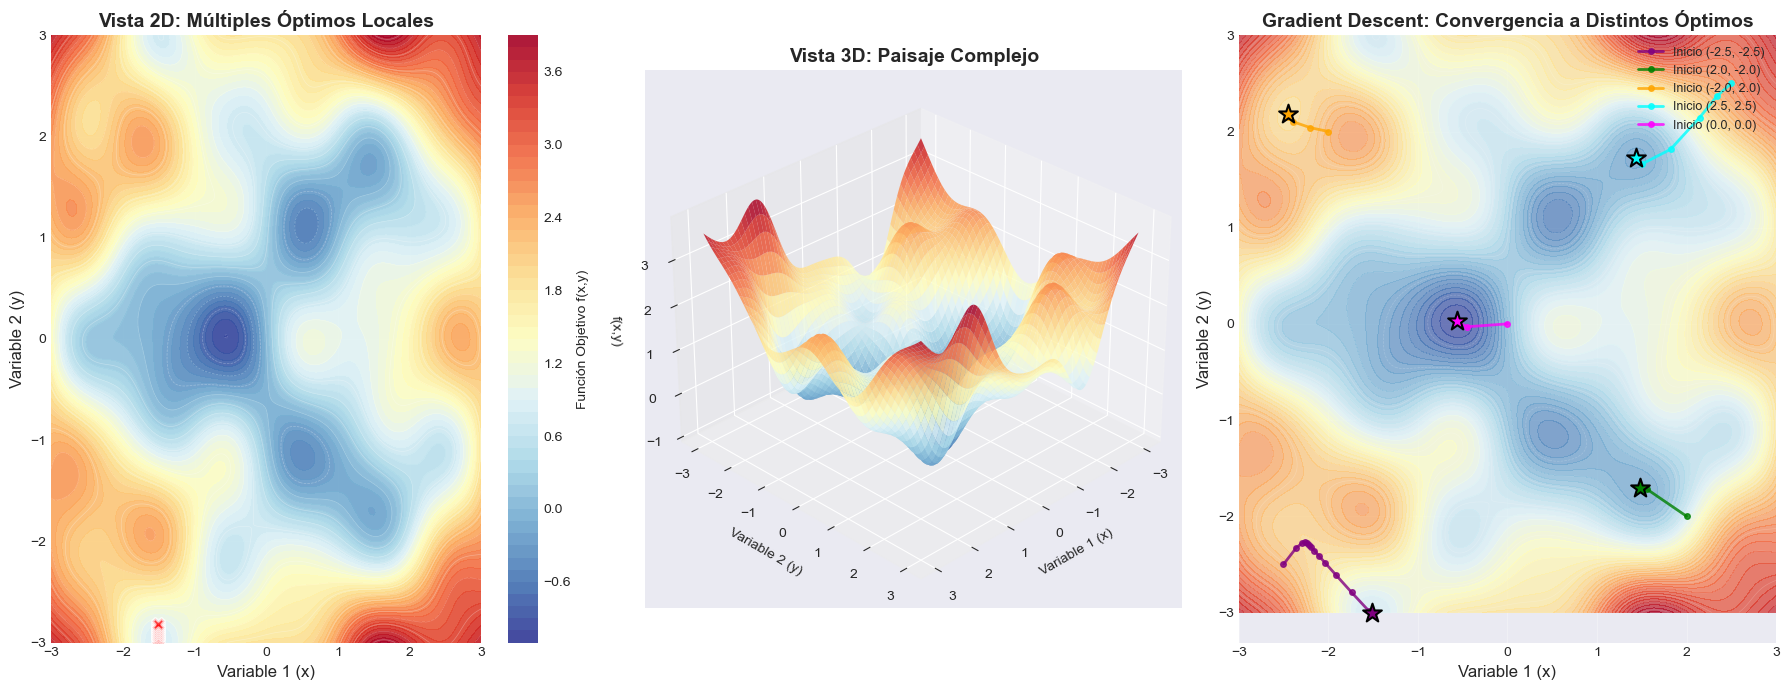

In [5]:

# ============================================================================
# FUNCIÓN OBJETIVO: PAISAJE MULTIMODAL COMPLEJO
# ============================================================================

def multimodal_landscape(x, y):
    """
    Función de prueba con múltiples óptimos locales.
    
    Combina:
    - Componente cuadrática: (x² + y²) → crea un mínimo central
    - Componentes oscilatorias: sin/cos → crean múltiples valles
    
    Simula la complejidad de problemas reales de optimización.
    """
    # Término cuadrático (parábola base)
    quadratic = 0.2 * (x**2 + y**2)
    
    # Oscilaciones de diferente frecuencia (crean múltiples mínimos)
    oscillation1 = np.sin(x) * np.cos(2*y)
    oscillation2 = 0.5 * np.sin(3*x) * np.cos(3*y)
    oscillation3 = 0.1 * np.sin(5*x + 2*y)
    
    return quadratic + oscillation1 + oscillation2 + oscillation3


# ============================================================================
# GENERAR DATOS PARA VISUALIZACIÓN
# ============================================================================

# Crear grilla 2D de 300x300 puntos en el rango [-3, 3] × [-3, 3]
x_range = np.linspace(-3, 3, 300)
y_range = np.linspace(-3, 3, 300)

# Meshgrid: convierte vectores 1D en matrices 2D para evaluación
X, Y = np.meshgrid(x_range, y_range)

# Evaluar la función en toda la grilla
Z = multimodal_landscape(X, Y)


# ============================================================================
# IDENTIFICAR ÓPTIMOS LOCALES (aproximadamente)
# ============================================================================
# Nota: En problemas reales, NO conocemos dónde están los óptimos locales

# Encontrar mínimos locales usando análisis de extremos
# order=50 significa que un punto debe ser menor que sus 50 vecinos
flat_indices = argrelextrema(Z.ravel(), np.less, order=50)[0]

# Convertir índices planos a coordenadas (x, y)
local_minima = []
for idx in flat_indices[:10]:  # Tomar los primeros 10 mínimos
    i, j = np.unravel_index(idx, Z.shape)  # Convertir índice 1D → 2D
    local_minima.append((X[i, j], Y[i, j]))

print(f"Mínimos locales identificados: {len(local_minima)}")


# ============================================================================
# FUNCIÓN: GRADIENT DESCENT SIMULADO EN 2D
# ============================================================================

def gradient_descent_2d(f, x0, y0, lr=0.1, max_steps=50, tolerance=1e-3):
    """
    Implementación simple de gradient descent en 2D.
    
    Parámetros:
    -----------
    f : función
        Función objetivo f(x, y) a minimizar
    x0, y0 : float
        Punto inicial
    lr : float
        Learning rate (tamaño del paso)
    max_steps : int
        Número máximo de iteraciones
    tolerance : float
        Criterio de parada (magnitud del gradiente)
    
    Retorna:
    --------
    array : Trayectoria de puntos visitados [(x, y), ...]
    """
    x, y = x0, y0
    trajectory = [(x, y)]
    
    # h: paso pequeño para aproximar derivadas numéricamente
    h = 1e-5
    
    for step in range(max_steps):
        # Calcular gradiente numérico (aproximación de derivadas)
        # df/dx ≈ [f(x+h, y) - f(x-h, y)] / 2h
        df_dx = (f(x + h, y) - f(x - h, y)) / (2 * h)
        df_dy = (f(x, y + h) - f(x, y - h)) / (2 * h)
        
        # Actualizar posición en dirección opuesta al gradiente
        # (descenso = hacia valores menores)
        x = x - lr * df_dx
        y = y - lr * df_dy
        
        # Guardar punto visitado
        trajectory.append((x, y))
        
        # Criterio de parada: gradiente suficientemente pequeño
        gradient_magnitude = np.sqrt(df_dx**2 + df_dy**2)
        if gradient_magnitude < tolerance:
            break
    
    return np.array(trajectory)


# ============================================================================
# VISUALIZACIÓN: TRES PANELES
# ============================================================================

fig = plt.figure(figsize=(18, 7))

# ---------------------------------------------------------------------------
# Panel 1: MAPA DE CONTORNO 2D con mínimos locales marcados
# ---------------------------------------------------------------------------
ax1 = fig.add_subplot(131)

# Mapa de contorno relleno (colores representan altura)
contour = ax1.contourf(X, Y, Z, levels=50, cmap='RdYlBu_r', alpha=0.9)

# Líneas de contorno adicionales (como líneas topográficas)
ax1.contour(X, Y, Z, levels=20, colors='white', alpha=0.3, linewidths=0.5)

# Marcar mínimos locales con X rojas
for lm in local_minima:
    ax1.scatter(*lm,                    # Desempaquetar (x, y)
               color='red',             # Color rojo
               s=80,                    # Tamaño
               marker='X',              # Forma: X
               edgecolor='white',       # Borde blanco
               linewidth=2,             # Grosor del borde
               zorder=5,                # Dibuja encima
               alpha=0.7)               # Semi-transparente

ax1.set_title('Vista 2D: Múltiples Óptimos Locales', 
             fontsize=14, fontweight='bold')
ax1.set_xlabel('Variable 1 (x)', fontsize=12)
ax1.set_ylabel('Variable 2 (y)', fontsize=12)

# Barra de color para interpretar alturas
plt.colorbar(contour, ax=ax1, label='Función Objetivo f(x,y)')
ax1.grid(True, alpha=0.3)

# ---------------------------------------------------------------------------
# Panel 2: VISTA 3D del paisaje
# ---------------------------------------------------------------------------
ax2 = fig.add_subplot(132, projection='3d')

# Superficie 3D con colores según altura
surf = ax2.plot_surface(X, Y, Z, 
                       cmap='RdYlBu_r',      # Mismo esquema de color
                       alpha=0.85,            # Ligeramente transparente
                       edgecolor='none',      # Sin líneas de grilla
                       rstride=5,             # Resolución en filas
                       cstride=5)             # Resolución en columnas

ax2.set_title('Vista 3D: Paisaje Complejo', fontsize=14, fontweight='bold')
ax2.set_xlabel('Variable 1 (x)', fontsize=10)
ax2.set_ylabel('Variable 2 (y)', fontsize=10)
ax2.set_zlabel('f(x,y)', fontsize=10)

# Ángulo de vista (elevación=30°, azimut=45°)
ax2.view_init(elev=30, azim=45)

# ---------------------------------------------------------------------------
# Panel 3: TRAYECTORIAS DE GRADIENT DESCENT desde diferentes inicios
# ---------------------------------------------------------------------------
ax3 = fig.add_subplot(133)

# Fondo: mapa de contorno
contour2 = ax3.contourf(X, Y, Z, levels=50, cmap='RdYlBu_r', alpha=0.7)
ax3.contour(X, Y, Z, levels=20, colors='white', alpha=0.2, linewidths=0.5)

# Definir 5 puntos iniciales diferentes en las esquinas y centro
start_points = [
    (-2.5, -2.5),  # Esquina inferior izquierda
    (2.0, -2.0),   # Esquina inferior derecha
    (-2.0, 2.0),   # Esquina superior izquierda
    (2.5, 2.5),    # Esquina superior derecha
    (0.0, 0.0)     # Centro
]

# Colores distintivos para cada trayectoria
colors = ['purple', 'green', 'orange', 'cyan', 'magenta']

# Ejecutar gradient descent desde cada punto inicial
for (x0, y0), color in zip(start_points, colors):
    # Calcular trayectoria completa
    trajectory = gradient_descent_2d(multimodal_landscape, x0, y0, 
                                    lr=0.15,      # Learning rate
                                    max_steps=30)  # Máximo 30 pasos
    
    # Plotear trayectoria como línea con puntos
    ax3.plot(trajectory[:, 0], trajectory[:, 1],  # Columnas x e y
            'o-',                                  # Círculos conectados
            color=color, 
            linewidth=2, 
            markersize=4, 
            label=f'Inicio ({x0:.1f}, {y0:.1f})',
            alpha=0.8)
    
    # Marcar punto de convergencia final con estrella grande
    ax3.scatter(trajectory[-1, 0], trajectory[-1, 1],  # Último punto
               color=color, 
               s=200,                  # Tamaño grande
               marker='*',             # Estrella
               edgecolor='black',      # Borde negro
               linewidth=1.5, 
               zorder=10)              # Dibuja encima de todo

ax3.set_title('Descenso de gradiente: Convergencia a Distintos Óptimos', 
             fontsize=14, fontweight='bold')
ax3.set_xlabel('Variable 1 (x)', fontsize=12)
ax3.set_ylabel('Variable 2 (y)', fontsize=12)
ax3.legend(loc='upper right', fontsize=9)
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


#### Análisis cuantitativo del paisaje

##### Características cuantitativas de nuestro paisaje de ejemplo

**Configuración del problema:**
- **Dimensión**: 2D (x, y) — simplificado para visualización, pero representativo de problemas de alta dimensión
- **Dominio**: [-3, 3] × [-3, 3]
- **Resolución de exploración**: 90,000 puntos evaluados en una malla regular (300 × 300)
- **Tipo de función**: No convexa, diferenciable, multimodal

**Complejidad del paisaje:**
- **Óptimos locales identificados**: 10 mínimos distintos (probablemente hay más)
- **Rango de valores**: f(x,y) ∈ [-1.001, 3.847]
- **Variación**: ~4.85 unidades entre el peor y mejor valor
- **Estructura**: Múltiples "cuencas" de atracción donde gradient descent puede quedar atrapado

> **Nota crítica**: En problemas reales, NO conocemos de antemano cuántos óptimos locales existen, dónde están ubicados, ni cuál es el mejor. Solo podemos evaluar f(x,y) en puntos específicos.


#### Interpretación del paisaje de búsqueda

**Panel 1 (Vista 2D - Contorno)**:
- Los **colores** representan el valor de f(x,y): azul (bajo/bueno) → rojo (alto/malo)
- Las **líneas de contorno** son como curvas de nivel en un mapa topográfico
- Las **X rojas** marcan los mínimos locales identificados
- Un algoritmo en cualquier "cuenca" rodará naturalmente hacia el mínimo más cercano

**Panel 2 (Vista 3D - Superficie)**:
- Muestra la "geografía" real con alturas
- Los **valles profundos** son mínimos locales fuertes (difíciles de escapar)
- Las **crestas** separan diferentes cuencas de atracción
- La **rugosidad** indica qué tan "accidentado" es el paisaje

**Panel 3 (Trayectorias de gradient descent)**:
- Cada **línea de color** es el camino seguido desde un punto inicial
- Las **estrellas** marcan dónde convergió cada búsqueda
- **Conclusión visual**: cinco búsquedas independientes → cinco soluciones diferentes


#### Resultados del experimento con *descenso de gradiente*

##### Configuración experimental

**Algoritmo**: Gradient descent con derivadas numéricas

**Parámetros**:
- 5 puntos iniciales distribuidos estratégicamente (4 esquinas + centro)
- Learning rate: 0.15
- Máximo de iteraciones: 30 por ejecución
- Criterio de parada: ||∇f|| < 0.001

##### Resultado observado

> **Cada ejecución de descenso de gradiente converge a un óptimo local diferente**, dependiendo únicamente del punto de inicio.

- El algoritmo es **determinista**: desde el mismo inicio, siempre llega al mismo final
- No hay "búsqueda global": el algoritmo solo "ve" el gradiente local
- La solución encontrada depende **críticamente de la inicialización**
- En 5 ejecuciones, obtuvimos 5 soluciones diferentes (posiblemente ninguna es la óptima global)


#### Implicaciones para problemas reales

##### El problema de escalamiento: de 2D a alta dimensión

**Lo que podemos hacer en 2D (este ejemplo):**

✓ Visualizar todo el paisaje completo  
✓ Identificar todos los mínimos locales  
✓ Comparar visualmente la calidad de las soluciones  
✓ Ver exactamente por qué gradient descent falla  

**Lo que NO podemos hacer en 100 dimensiones:**

✗ Visualizar nada (los humanos vemos en 3D, máximo)  
✗ Saber cuántos mínimos locales existen  
✗ Determinar si nuestra solución es "buena" sin exploración exhaustiva  
✗ Intuir la "forma" del paisaje  

> La búsqueda exhaustiva (evaluar todos los puntos) es **imposible** en alta dimensión. Necesitamos estrategias inteligentes de exploración.

##### ¿Qué necesitamos para navegar paisajes complejos?

Para resolver problemas de optimización en espacios de alta dimensión con múltiples óptimos locales, requerimos métodos con las sigueintes características:

1. **Exploración global multiinicio**  
   Buscar simultáneamente en múltiples regiones del espacio, no solo seguir un gradiente local desde un único punto

2. **Mecanismos de escape**  
   Capacidad de "saltar" fuera de valles subóptimos mediante perturbaciones estratégicas o aceptación probabilística de soluciones peores

3. **Independencia de la diferenciabilidad**  
   Funcionar con funciones no diferenciables, discretas, ruidosas, o incluso de "caja negra" (solo podemos evaluar f(x), no calcular ∇f)

4. **Eficiencia evaluativa**  
   Minimizar el número de evaluaciones de f(x) cuando cada una es computacionalmente costosa (ej: entrenar una red neuronal completa)

5. **Balance exploración-explotación**  
   Saber cuándo explorar nuevas regiones vs. refinar soluciones prometedoras ya encontradas

#### Conexión con metaheurísticas

> **Las metaheurísticas están específicamente diseñadas para cumplir estos requisitos en paisajes de búsqueda complejos.**

**Gradient Descent (método tradicional):**
- Mantiene **un único candidato** que se mueve según ∇f
- Estrategia: **explotación pura** del gradiente local
- Queda **atrapado** en el primer mínimo local que encuentra
- **Requiere**: función diferenciable, punto inicial "afortunado"
- **Fortaleza**: convergencia rápida en paisajes convexos

**Metaheurísticas (enfoque moderno):**
- Mantienen **población de candidatos** explorando simultáneamente
- Estrategia: **balance** entre exploración (diversidad) y explotación (convergencia)
- Usan **mecanismos estocásticos** (mutación, cruce, perturbación) para escapar de óptimos locales
- **Solo requieren**: capacidad de evaluar f(x) → no necesitan derivadas
- **Fortaleza**: robustez en paisajes multimodales, no convexos, de alta dimensión

**Ejemplos de mecanismos de exploración:**
- **Algoritmos genéticos**: población evoluciona mediante selección, cruce y mutación
- **Recocido simulado (Simulated Annealing)**: acepta soluciones peores con probabilidad decreciente (escape térmico)
- **Enjambre de Partículas (PSO - Particle Swarm Optimization)**: partículas exploran el espacio influenciadas por mejores vecinos
- **Evolución difetencial**: genera nuevos candidatos por combinación vectorial

> *"Optimizar no es solo encontrar el mejor punto: es aprender a navegar un paisaje lleno de montañas, valles, trampas y sorpresas... sin un mapa."*


## 2. Definición actualizada de metaheurística

#### Evolución histórica del concepto

**Década 1980-1990:** "Algoritmos inspirados en fenómenos naturales"  
→ Énfasis en la metáfora biológica (hormigas, abejas, evolución, recocido)

**Década 2000-2010:** "Estrategias de búsqueda inteligente"  
→ Énfasis en la exploración/explotación, memoria, adaptación

**Actualidad (2020s):**

<div style="background: linear-gradient(to right, #e3f2fd, #bbdefb); border-left: 5px solid #24398A; padding: 20px; margin: 20px 0; border-radius: 5px;">
<h3>Definición contemporánea de metaheurística</h3>

Una <strong>metaheurística</strong> es un <strong>marco de búsqueda general</strong> que:

1. <strong>Coordina reglas heurísticas</strong> (guías de decisión simples)
2. <strong>Combina exploración y explotación</strong> (global vs. local)
3. <strong>Se adapta dinámicamente</strong> al paisaje de búsqueda
4. <strong>Maneja información parcial</strong> sin conocer la función completa
5. <strong>Produce soluciones suficientemente buenas</strong> bajo restricciones prácticas

<em>Su objetivo no es encontrar el óptimo matemático, sino encontrar <strong>soluciones útiles</strong> en tiempo razonable para problemas complejos donde métodos exactos fallan.</em>
</div>

### Características clave en la práctica

| Característica | Significado práctico | Ejemplo en Ciencia de datos |
|----------------|---------------------|-----------------------------|
| **Información parcial** | Solo evalúa puntos individuales | Cada evaluación entrena un modelo ML |
| **Guiada por historia** | Usa estados anteriores | Mantiene las mejores soluciones encontradas |
| **Estocástica** | Incorpora aleatoriedad controlada | Mutaciones, perturbaciones aleatorias |
| **Aproximada** | No garantiza óptimo global | Solución "suficientemente buena" en tiempo limitado |
| **Flexible** | Aplicable a muchos dominios | Feature selection, NAS, hiperparámetros |
| **Adaptativa** | Ajusta su estrategia | Cambia tasa de exploración según progreso |



### Contraste filosófico: Dos formas de abordar problemas


| MÉTODOS EXACTOS <br> (Cálculo Perfecto)  | METAHEURÍSTICAS <br> (Navegación Inteligente) |
|-----------------------------------------|---------------------------------------------|
| • Garantía matemática de optimalidad <br>• Requiere estructura completa <br>• Determinístico<br>• Intratable para problemas grandes <br>• *Es como tener un mapa completo*  | • Inteligencia situada en el problema <br>• Funciona con información parcial<br>• Estocástico (aleatoriedad controlada)<br>• Escalable a problemas grandes<br>• Es como explorar con brújula y experiencia   |
| **Ventaja**: Óptimo si funciona         | **Ventaja:** Solución práctica donde los <br> métodos exactos fallan |
| *Limitación:* Solo para problemas pequeños| *Limitación:* No garantiza optimalidad      |


### Analogía ilustrativa

**Problema:** Encontrar el punto más bajo en una región montañosa (en la oscuridad)

- **Método exacto:** Tener un mapa topográfico completo → calcular el mínimo global
- **Gradient descent:** Usar un inclinómetro → bajar siempre → atascarse en valles locales
- **Metaheurística:** 
  1. Lanzar múltiples exploradores a diferentes zonas
  2. Cada uno explora localmente
  3. Comparten información sobre terrenos prometedores
  4. Se concentran en las mejores zonas
  5. A veces exploran aleatoriamente nuevas áreas
  
> Los métodos metaheurísticos no garantizan encontrar el punto ABSOLUTAMENTE más bajo, pero encuentran puntos MUY BAJOS en tiempo razonable.

---

## 3. Taxonomía moderna de metaheurísticas

Las metaheurísticas se diferencian fundamentalmente por su **estrategia de exploración del espacio de búsqueda**. Esta distinción—desde métodos de trayectoria única hasta enfoques poblacionales y basados en modelos—determina sus fortalezas, limitaciones y casos de uso apropiados.

### Clasificación por estrategia de búsqueda

La forma más útil de clasificar metaheurísticas hoy es según su **estrategia fundamental de búsqueda**:

#### A. De trayectoria única (trajectory-based)

**Principio:** Mantiene y evoluciona UNA solución candidata, modificándola iterativamente mediante movimientos locales.

| Algoritmo | Mecanismo Clave | Ventajas | Desventajas | Aplicación Típica |
|-----------|-----------------|----------|-------------|-------------------|
| **Escalada de colinas** (Hill Climbing) | Movimientos locales hacia el mejor vecino disponible | Simple, rápido, bajo uso de memoria | Atascamiento en óptimos locales, sin mecanismo de escape | Problemas pequeños con buen punto inicial |
| **Recocido simulado** (Simulated Annealing) | Aceptación probabilística de peores soluciones según "temperatura" | Escapa de óptimos locales, garantías teóricas de convergencia | Sensible a parámetros (temperatura, enfriamiento) | Optimización continua, problemas de física estadística |
| **Búsqueda tabú** (Tabu Search) | Memoria de corto plazo (lista tabú) + criterios de aspiración | Evita ciclos, estrategias de diversificación/intensificación | Requiere memoria adicional, diseño de estructuras tabú | Calendarización (scheduling), problemas de rutas |
| **Búsqueda local iterada** (Iterated Local Search) | Perturbaciones estratégicas + búsqueda local repetida | Balance natural exploración/explotación | Diseño crítico de perturbación | Problemas combinatorios difíciles |
| **Búsqueda de vecindad variable** (Variable Neighborhood Search) | Cambio sistemático entre diferentes estructuras de vecindad | Exploración estructurada, escapa óptimos locales | Definición de vecindarios apropiados | Optimización discreta, problemas de ruteo |

**Cuándo usar:** Problemas donde cada evaluación de f(x) es muy costosa (simulaciones complejas, entrenamientos largos) y no podemos permitirnos mantener una población completa.

**Ventaja principal:** Eficiencia en memoria y evaluaciones.  
**Limitación principal:** Exploración limitada del espacio de búsqueda.

#### B. Basadas en población (population-based)

**Principio:** Mantienen y evolucionan MÚLTIPLES soluciones simultáneamente, favoreciendo la diversidad y exploración paralela.

| Algoritmo | Metáfora/Principio | Ventajas | Desventajas | Aplicación Típica |
|-----------|-------------------|----------|-------------|-------------------|
| **Algoritmos genéticos** (Genetic Algorithms) | Evolución biológica: selección natural, cruce genético, mutación | Diversidad natural, paralelismo, robustez | Muchos parámetros, convergencia lenta inicial | Selección de variables, búsqueda de arquitecturas (NAS) |
| **Optimización por enjambre de partículas** (Particle Swarm Optimization - PSO) | Comportamiento social: partículas con velocidad, memoria individual y social | Convergencia rápida inicial, pocos parámetros | Tendencia a atascamiento en óptimos locales | Ajuste de hiperparámetros, problemas de control |
| **Evolución diferencial** (Differential Evolution) | Mutación mediante diferencias vectoriales entre individuos | Muy robusto, pocos parámetros, simple | Convergencia lenta en problemas simples | Optimización numérica continua de alta dimensión |
| **Optimización de colonia de hormigas** (Ant Colony Optimization) | Comunicación indirecta mediante feromonas en grafos | Excelente para problemas de rutas, construcción incremental | Específico para problemas combinatorios en grafos | Problema del viajante (TSP), calendarización |
| **Algoritmo de luciérnagas** (Firefly Algorithm) | Atracción basada en intensidad luminosa y distancia | Balance automático exploración/explotación | Sensible a parámetros de atracción | Problemas multimodales, agrupamiento (clustering) |

**Cuándo usar:** Problemas con múltiples óptimos locales donde necesitamos exploración paralela de diferentes regiones del espacio.

**Ventaja principal:** Exploración global robusta.  
**Limitación principal:** Mayor costo computacional (múltiples evaluaciones por iteración).

#### C. Basadas en memoria/modelos (model-based)

**Principio:** Construyen un MODELO PROBABILÍSTICO o APROXIMACIÓN del paisaje de búsqueda para guiar la exploración de manera más inteligente.

| Enfoque | Qué Modela | Ventajas | Desventajas | Ejemplo |
|---------|------------|----------|-------------|--------|
| **Algoritmos de estimación de distribuciones** (Estimation of Distribution Algorithms - EDA) | Distribución de probabilidad de las regiones prometedoras | Aprendizaje explícito del paisaje, sin operadores arbitrarios | Costoso computacionalmente, modelos complejos | EDA, PBIL, UMDA |
| **Optimización basada en sustitutos** (Surrogate-Based Optimization) | Función objetivo aproximada (metamodelo) | Eficiente para evaluaciones extremadamente costosas | Error del modelo sustituto, overfitting | Optimización bayesiana, kriging |
| **Hiper-heurísticas** (Hyper-Heuristics) | Cuándo y cómo aplicar diferentes heurísticas de bajo nivel | Automatización de selección de estrategias | Mayor complejidad arquitectural | Aprendizaje por refuerzo para optimización |

**Cuándo usar:** Evaluaciones extremadamente costosas (horas/días por evaluación), como simulaciones CFD, entrenamiento de modelos grandes, o experimentos físicos.

**Ventaja principal:** Minimiza evaluaciones de la función objetivo real.  
**Limitación principal:** Requiere ajuste y validación del modelo sustituto.

#### D. Enfoques híbridos - LA TENDENCIA ACTUAL

**Principio:** Combinan lo mejor de diferentes enfoques para aprovechar sinergias y compensar debilidades individuales.

| Tipo de combinación | Ejemplo concreto | Beneficio obtenido |
|---------------------|------------------|-------------------|
| Metaheurística + Búsqueda local | AG + Escalada de colinas al final | Exploración global (AG) + refinamiento local (HC) |
| Metaheurística + Aprendizaje automático | PSO + Red neuronal sustituta | Reducir drásticamente evaluaciones costosas |
| Múltiples metaheurísticas cooperativas | Modelos de islas (poblaciones separadas con migración) | Diversidad de estrategias, paralelismo natural |
| Metaheurística + Heurística de dominio | Algoritmo genético + 2-opt para TSP | Aprovechar conocimiento específico del problema |
| Metaheurística + Exacto | AG para exploración + Branch & Bound para validación | Garantías de calidad cuando es posible |

**Estadística reciente:** Aproximadamente el **80% de las aplicaciones exitosas** reportadas en literatura especializada (2020-2025) utilizan enfoques híbridos en lugar de metaheurísticas puras.

**Razón del éxito:** Ninguna metaheurística es universalmente superior (No Free Lunch Theorem). Los híbridos adaptativos aprovechan fortalezas complementarias según la fase de búsqueda o características del problema.

#### Perspectiva académica vs. industrial

**En investigación académica:**
- Se valora la **novedad metodológica**: nuevas variantes, operadores innovadores, análisis teóricos de convergencia
- Objetivo: publicaciones que avanzan el estado del arte
- Enfoque: benchmark en problemas estándar, comparaciones estadísticas rigurosas
- Tendencia: exploración de metaheurísticas bio-inspiradas recientes (algoritmo de ballenas, optimización de águilas, etc.)

**En aplicaciones industriales y profesionales:**
- Se valora la **robustez y simplicidad**: métodos comprobados, fáciles de implementar y mantener
- Objetivo: resolver el problema del negocio de manera confiable
- Enfoque: tiempo de implementación, explicabilidad para stakeholders, integración con sistemas existentes
- Tendencia: algoritmos genéticos, PSO, evolución diferencial, y recocido simulado siguen dominando

**Paradoja observada:** Las metaheurísticas "clásicas" (1970-1990) como algoritmos genéticos, recocido simulado y búsqueda tabú representan aproximadamente el **70-85% de las implementaciones industriales exitosas**, mientras que metaheurísticas más recientes y exóticas predominan en publicaciones académicas pero rara vez trascienden al uso productivo.

**Factores que explican esta brecha:**

| Factor | Preferencia académica | Preferencia industrial |
|--------|----------------------|------------------------|
| **Novedad** | Algoritmos recientes (post-2010) | Algoritmos probados (pre-2000) |
| **Complejidad** | Aceptable si mejora performance | Rechazada si complica mantenimiento |
| **Benchmarking** | Funciones de prueba estándar | Problema real específico |
| **Documentación** | Papers académicos | Código productivo, APIs estables |
| **Soporte** | Implementaciones de investigación | Librerías maduras (DEAP, pymoo, scikit-opt) |
| **Explicabilidad** | Menos crítica | Crítica para aprobación gerencial |

### Criterios de selección práctica

**Pregunta clave:** ¿Qué enfoque elegir para mi problema?

| Característica del problema | Enfoque recomendado |
|------------------------------|---------------------|
| Evaluación muy costosa (>1 hora) | Basado en modelos (optimización bayesiana) |
| Espacio continuo, diferenciable | Evolución diferencial o PSO |
| Espacio discreto/combinatorio | Algoritmos genéticos o búsqueda tabú |
| Estructura de grafo | Colonia de hormigas |
| Múltiples óptimos locales conocidos | Basado en población (AG, PSO) |
| Evaluación rápida, espacio pequeño | Trayectoria única (recocido simulado) |
| Sin conocimiento previo del problema | Híbrido adaptativo (AG + búsqueda local) |

---

## 4. Heurísticas, metaheurísticas y enfoques híbridos

### Jerarquía de métodos de optimización
```
┌─────────────────────────────────────────────────────────┐
│                METAHEURÍSTICAS                          │
│   (Estrategias de alto nivel que coordinan la búsqueda) │
│   • Independientes del problema específico              │
│   • Adaptan y combinan heurísticas dinámicamente        │
├─────────────────────────────────────────────────────────┤
│                 HEURÍSTICAS                             │
│        (Reglas simples para decisiones locales)         │
│   • Específicas del problema                            │
│   • Rápidas pero sin garantías de optimalidad           │
├─────────────────────────────────────────────────────────┤
│              CONOCIMIENTO DEL DOMINIO                   │
│    (Estructura y restricciones del problema real)       │
│   • Propiedades matemáticas conocidas                   │
│   • Restricciones del mundo físico/negocio              │
└─────────────────────────────────────────────────────────┘
```

### Diferencias clave

| Concepto | Qué es | Alcance | Garantías | Ejemplo concreto |
|----------|--------|---------|-----------|------------------|
| **Heurística** | Regla específica que da una solución rápida (probablemente buena, no necesariamente óptima) | Problema específico | Ninguna (puede fallar) | "En el TSP, siempre visita la ciudad más cercana que no hayas visitado" (Greedy Nearest Neighbor) |
| **Metaheurística** | Marco general de búsqueda que coordina estrategias de exploración/explotación | Familia de problemas | Convergencia eventual (no a óptimo global) | Algoritmo Genético: población que evoluciona mediante selección, cruce y mutación |
| **Enfoque híbrido** | Combina metaheurística con otros métodos (heurísticas específicas, modelos, búsqueda exacta) | Adaptado al problema | Depende de los componentes | AG (exploración global) + Hill Climbing (refinamiento local) + 2-opt (TSP específico) |

### Ejemplo comparativo: Problema del Viajante (TSP)

**Solo heurística (Nearest Neighbor):**
```
1. Inicia en ciudad aleatoria
2. Mientras haya ciudades sin visitar:
   - Ve a la ciudad más cercana no visitada
3. Regresa al inicio
```
- Muy rápido (O(n²))
- *Solución típicamente 15-25% peor que el óptimo*
- *Puede quedar atrapado en configuraciones pobres*

**Metaheurística pura (Algoritmo Genético):**
```
1. Genera población de tours aleatorios
2. Repite N generaciones:
   - Selecciona mejores tours (fitness = longitud inversa)
   - Cruza tours para crear hijos (ej: Order Crossover)
   - Muta algunos (swap de ciudades)
   - Reemplaza población
3. Devuelve mejor tour encontrado
```
- Explora ampliamente el espacio de soluciones
- Evita quedar atrapado fácilmente
- *Lento (miles de evaluaciones)*
- *No aprovecha estructura específica del TSP*

**Híbrido (GA + Búsqueda Local + Heurística de dominio):**
```
1. Genera población usando Nearest Neighbor + perturbaciones
   → aprovecha conocimiento del dominio
2. Repite N generaciones:
   - Selecciona mejores tours
   - Cruza con operador que preserva subtours (Edge Recombination)
     → respeta estructura del TSP
   - Aplica 2-opt local search a cada hijo
     → mejora local garantizada
   - Muta algunos estratégicamente
3. Devuelve mejor tour + refinamiento final con 3-opt
```
- Combina exploración global (GA) + explotación local (2-opt)
- Usa conocimiento del problema (operadores especializados)
- Típicamente 1-5% del óptimo en problemas grandes
- *Más complejo de implementar y ajustar*
- *Académicamente suele criticarse por "hacer trampa/mano negra"; riesgo de convergencia prematura*

### ¿Cuándo usar cada enfoque?

| Situación | Recomendación | Justificación |
|-----------|---------------|---------------|
| Prototipo rápido, solución "suficientemente buena" | **Heurística simple** | Implementación en minutos, resultados inmediatos |
| Problema nuevo, sin conocimiento previo | **Metaheurística estándar** (AG, PSO) | Robustez sin necesidad de especialización |
| Evaluación muy costosa (<100 evaluaciones disponibles) | **Híbrido con modelo sustituto** (Bayesian Opt) | Minimiza evaluaciones de f(x) real |
| Problema bien estudiado (TSP, scheduling, etc.) | **Híbrido especializado** | Aprovecha décadas de investigación del dominio |
| Restricciones complejas del mundo real | **Híbrido con reparación** | Metaheurística + heurística que garantiza factibilidad |

### Construcción progresiva de soluciones

**Estrategia recomendada para implementación:**

1. **Fase 1 - Baseline:** Implementa una heurística simple conocida
   - Establece tiempo de ejecución y calidad de referencia
   - Identifica limitaciones evidentes

2. **Fase 2 - Metaheurística pura:** Implementa AG/PSO/SA estándar
   - Compara con baseline: ¿mejora significativa?
   - Analiza: ¿dónde falla? (convergencia prematura, lentitud, etc.)

3. **Fase 3 - Hibridación informada:** Agrega componentes según debilidades
   - Si converge prematuramente → añade diversificación (hipermutación)
   - Si explora bien pero no refina → añade búsqueda local
   - Si evaluación es costosa → añade modelo sustituto

4. **Fase 4 - Especialización de dominio:** Incorpora conocimiento específico
   - Operadores que respetan estructura del problema
   - Heurísticas de reparación/construcción
   - Inicialización inteligente

> **"Una metaheurística te da la estrategia de búsqueda. Una heurística te da movimientos inteligentes. El conocimiento del dominio te dice qué movimientos son legales. Combínalos bien y tienes un solucionador poderoso."**

---

## 5. Búsqueda local: El fundamento de la exploración

La **búsqueda local** (*Local Search*) es el paradigma más fundamental de optimización iterativa. Representa la **explotación pura**: partir de una solución y mejorarla mediante cambios incrementales. Aunque simple en concepto, es el cimiento sobre el cual se construyen prácticamente todas las metaheurísticas modernas.

### Definición formal

Un algoritmo de búsqueda local se define por tres componentes:

1. **Solución actual** ($x \in S$): El punto en el espacio de búsqueda que estamos evaluando
2. **Función de vecindad** ($N(x)$): El conjunto de soluciones "cercanas" a $x$ que podemos alcanzar con un movimiento
3. **Criterio de aceptación**: La regla que decide si nos movemos a un vecino o permanecemos en $x$

**Principio operativo:**
```
1. Inicia con solución x₀ (aleatoria o heurística)
2. Mientras no se cumpla criterio de parada:
   a. Genera vecindario N(x_actual)
   b. Evalúa vecinos según función objetivo f(x)
   c. Si existe vecino mejor → muévete a él
   d. Si no hay mejora → termina (óptimo local)
3. Retorna mejor solución encontrada
```

### Características fundamentales

| Característica | Descripción | Implicación |
|----------------|-------------|-------------|
| **Explotación pura** | Se enfoca exclusivamente en mejorar la solución actual | No explora regiones distantes del espacio |
| **Trayectoria única** | Mantiene una sola solución que evoluciona | Bajo uso de memoria, rápido por iteración |
| **Determinista local** | Dado un $x$ y vecindario, el siguiente paso es predecible | Reproducible, pero sensible a inicialización |
| **Convergencia garantizada** | Siempre termina (en espacios finitos) | Pero NO garantiza óptimo global |
| **Limitación crítica** | Queda atrapado en **óptimos locales** | Necesita mecanismos de escape (→ metaheurísticas) |

### El concepto de vecindario

El **vecindario** $N(x)$ es fundamental: define qué soluciones son "accesibles" desde $x$ en un solo paso.

**Ejemplos de vecindarios según el problema:**

| Problema | Representación de x | Vecindario N(x) | Tamaño de N(x) |
|----------|---------------------|-----------------|----------------|
| **Optimización continua** | Vector x en R^n | Puntos dentro de radio ε: dist(x', x) < ε | Infinito (continuo) |
| **TSP** | Permutación de ciudades | Intercambio de 2 ciudades (2-opt) | C(n,2) = O(n²) |
| **Knapsack binario** | Vector binario x en {0,1}^n | Flip de un bit | n |
| **Asignación de tareas** | Matriz de asignaciones | Reasignar una tarea a otro recurso | O(n × m) |
| **Feature selection** | Subconjunto de variables | Agregar/quitar una variable | 2n (add/remove) |
**Decisiones de diseño críticas:**

1. **Tamaño del vecindario:**
   - Vecindario pequeño → convergencia rápida pero miope
   - Vecindario grande → mejor exploración pero costoso de evaluar

2. **Estructura del vecindario:**
   - Debe respetar restricciones del problema (soluciones factibles)
   - Debe ser alcanzable en tiempo razonable
   - Idealmente, debe conectar todo el espacio (alcanzabilidad)

### Anatomía del paisaje de búsqueda desde la perspectiva local

Recordando nuestro ejemplo del paisaje multimodal 2D:
```
        Pico (máximo local)
              ▲
             /│\
            / │ \
    ┌──────┐  │  ┌──────┐
    │Valle1│  │  │Valle2│  ← Óptimos locales
    └──────┘  │  └──────┘     (aquí queda atrapada 
       ▲      │      ▲         la búsqueda local)
       │   Cresta    │
       │      │      │
    [región de inicio]
```

**Desde la posición actual $x$:**
- El **gradiente** (si existe) apunta "cuesta arriba" o "cuesta abajo"
- El **vecindario** $N(x)$ son los puntos inmediatamente alcanzables
- La búsqueda local solo "ve" lo que está en $N(x)$, no el paisaje completo

**Concepto de cuenca de atracción:**
- Una **cuenca** es la región del espacio desde la cual la búsqueda local converge al mismo óptimo local
- Cuencas grandes → óptimos locales "fuertes" (difíciles de evitar)
- En nuestro ejemplo 2D visualizado, cada valle tiene su cuenca

### Variantes de búsqueda local

#### Por estrategia de selección de vecino:

| Estrategia | Descripción | Ventaja | Desventaja |
|------------|-------------|---------|------------|
| **Best Improvement** | Evalúa todo $N(x)$ y elige el mejor | Movimientos de mayor calidad | Costoso si $\|N(x)\|$ es grande |
| **First Improvement** | Acepta el primer vecino que mejora | Rápido, pocas evaluaciones | Puede hacer movimientos subóptimos |
| **Random Selection** | Evalúa vecinos aleatoriamente | Introduce estocasticidad | Menos eficiente |

#### Por criterio de aceptación:

| Criterio | Acepta vecino si... | Comportamiento |
|----------|---------------------|----------------|
| **Hill Climbing clásico** | $f(x') > f(x)$ (solo mejoras) | Convergencia rápida, atrapamiento seguro |
| **Simulated Annealing** | $f(x') > f(x)$ O con probabilidad $e^{-\Delta E/T}$ | Escapa óptimos locales temporalmente |
| **Tabu Search** | $f(x') > f(x)$ Y $x'$ no está en lista tabú | Evita regresar a soluciones visitadas |

### Rol en metaheurísticas modernas

La búsqueda local no es solo un algoritmo por sí mismo, sino un **componente fundamental** de metaheurísticas más sofisticadas:
```
┌─────────────────────────────────────────────────────────┐
│         METAHEURÍSTICA (exploración global)             │
│                                                         │
│  ┌──────────────┐         ┌───────────────┐             │
│  │ Generar      │────────>│ Búsqueda      │             │
│  │ soluciones   │         │ local         │             │
│  │ diversas     │<────────│ (refinamiento)│             │
│  └──────────────┘         └───────────────┘             │
│       ▲                          │                      │
│       │                          ▼                      │
│  (exploración)            (explotación)                 │
└─────────────────────────────────────────────────────────┘
```

**Ejemplos de uso en metaheurísticas:**

- **Algoritmos Genéticos:** Búsqueda local aplicada a descendencia después de cruce/mutación (Memetic Algorithms)
- **Simulated Annealing:** Búsqueda local con aceptación probabilística de empeoramientos
- **Tabu Search:** Búsqueda local con memoria de movimientos prohibidos
- **Iterated Local Search:** Búsqueda local + perturbaciones para escapar

### ¿Cuándo es suficiente la búsqueda local pura?

La búsqueda local SIN extensiones metaheurísticas puede ser apropiada cuando:

- El paisaje es **mayormente convexo** (un solo óptimo dominante)
- Hay un **punto inicial excelente** (de heurística constructiva)
- El problema es **pequeño** y puedes reiniciar múltiples veces
- La **velocidad** es crítica y aceptas soluciones locales
- El **costo de evaluación** es altísimo (pocas evaluaciones disponibles)  

**Ejemplo real:** Ajuste fino de hiperparámetros cercanos a valores conocidos buenos.

---

## 6. Ascenso a la colina (Hill climbing)

El algoritmo de **ascenso a la colina** es la metaheurística de búsqueda local más simple. Representa la estrategia más directa de **explotación** pura, donde el agente busca moverse inmediatamente hacia una mejor solución dentro de su vecindario inmediato. Es la base conceptual de muchas búsquedas locales en optimización combinatoria.

### Metáfora

Imagine a un explorador en un paisaje montañoso cubierto por una densa niebla. Su objetivo es alcanzar la cima más alta (el óptimo global). Dado que no puede ver más allá de sus pies, el explorador simplemente da un paso en la dirección que lo lleve **inmediatamente más alto**.

### Algoritmo básico

El ascenso a la colina es un ciclo iterativo que siempre favorece el mejoramiento. Solo se aceptan movimientos que mejoran la calidad de la solución (valor de *fitness* o función objetivo).

1.  **Inicialización**: Se elige un punto de partida ($x_{actual}$) en el espacio de búsqueda.
2.  **Generación de Vecindario**: Se generan un conjunto de soluciones candidatas ($V$) en el vecindario inmediato de $x_{actual}$.
3.  **Selección del Mejor Vecino**: Se evalúa $V$ y se selecciona la mejor solución ($x_{mejor\_vecino}$).
4.  **Movimiento**: Si $x_{mejor\_vecino}$ es **estrictamente mejor** que $x_{actual}$, se reemplaza $x_{actual} = x_{mejor\_vecino}$.
5.  **Terminación**: Si no se encuentra un vecino mejor (es decir, $x_{actual}$ es el mejor punto en todo su vecindario), el algoritmo se **detiene**.

### Implementación simple en 1D

A continuación, implementamos una versión básica de Hill Climbing en un espacio unidimensional. Utilizaremos la función objetivo $f(x) = -x^2 + 10 \cdot \sin(5x)$, conocida por tener múltiples picos.


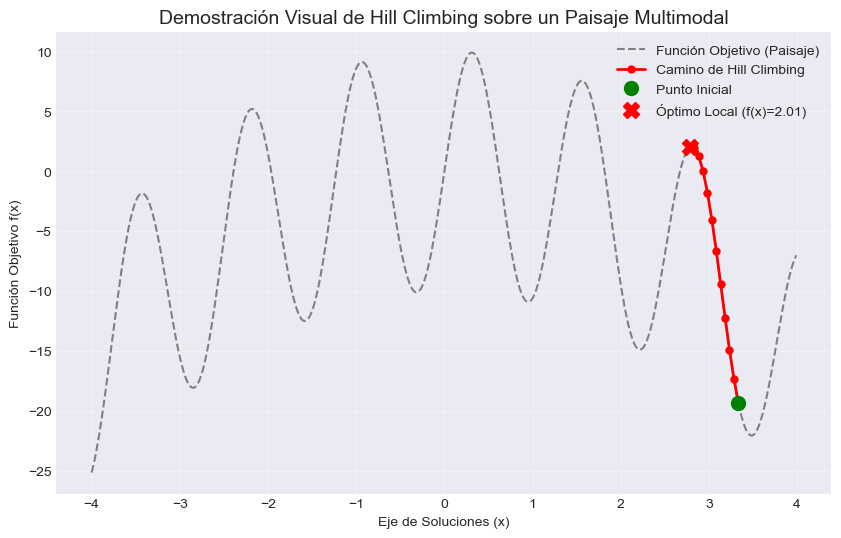


El algoritmo se detuvo en x = 2.7832 después de 11 pasos, atrapado en un óptimo local.


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

# 1. Función Objetivo (el Paisaje)
def objective(x):
    # Función multimodal para ilustrar el problema del óptimo local
    return -(x**2) + 10 * math.sin(5 * x)

# 2. Algoritmo Hill Climbing (solo registra el camino)
def hill_climb_path(x0, step=0.1, iterations=100):
    x = x0
    path = [x]
    
    for _ in range(iterations):
        # Generar vecinos
        candidates = [x + step, x - step]
        scores = [objective(c) for c in candidates]
        
        # Seleccionar el mejor vecino
        best_candidate = candidates[np.argmax(scores)]
        
        # Condición de movimiento: solo si hay mejora estricta
        if objective(best_candidate) > objective(x):
            x = best_candidate
            path.append(x)
        else:
            # Detener si no se encontró un vecino mejor (óptimo local)
            break
            
    return path

# --- Ejecución y Visualización ---

# Parámetros y rangos
RANGO_X = np.arange(-4.0, 4.0, 0.01)
Y_PAISAJE = [objective(x) for x in RANGO_X]
PUNTO_INICIAL = random.uniform(-3.5, 3.5)

# Generar el camino
path_coords = hill_climb_path(x0=PUNTO_INICIAL, step=0.05)
X_PATH = np.array(path_coords)
Y_PATH = np.array([objective(x) for x in X_PATH])

# --- Gráfico ---
plt.figure(figsize=(10, 6))

# Dibujar el paisaje completo
plt.plot(RANGO_X, Y_PAISAJE, color='gray', linestyle='--', label='Función Objetivo (Paisaje)')

# Dibujar el camino recorrido
plt.plot(X_PATH, Y_PATH, 'ro-', markersize=5, linewidth=2, label='Camino de Hill Climbing')

# Destacar el inicio y el fin
plt.plot(X_PATH[0], Y_PATH[0], 'go', markersize=10, label='Punto Inicial') # Verde para el inicio
plt.plot(X_PATH[-1], Y_PATH[-1], 'rX', markersize=12, label=f'Óptimo Local (f(x)={Y_PATH[-1]:.2f})') # Rojo X para el final

plt.title('Demostración Visual de Hill Climbing sobre un Paisaje Multimodal', fontsize=14)
plt.xlabel('Eje de Soluciones (x)')
plt.ylabel('Función Objetivo f(x)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

print(f"\nEl algoritmo se detuvo en x = {X_PATH[-1]:.4f} después de {len(X_PATH) - 1} pasos, atrapado en un óptimo local.")

### Limitación Crítica: El Óptimo Local

El principal defecto de Hill Climbing es su incapacidad para escapar de los **óptimos locales** (las "colinas" intermedias).

Si el agente alcanza una cima que no es la más alta (el óptimo global), se detendrá inmediatamente porque no hay *ningún* movimiento en su vecindario que mejore su posición. El algoritmo confunde el **óptimo local** con la solución final.

| Característica | Implicación |
| :--- | :--- |
| **Punto Fuerte** | Extremadamente rápido y simple. Útil en problemas convexos. |
| **Punto Débil** | Queda atrapado en el primer óptimo local que encuentra. Carece de **Exploración** global. |

Los métodos metaheurísticos más sofisticados, como el Recocido Simulado (*Simulated Annealing*) que veremos más adelante, fueron diseñados precisamente para superar esta debilidad, permitiendo **temporalmente movimientos peores** para tener la oportunidad de saltar fuera de los óptimos locales y alcanzar la cima verdadera.

### Hill Climbing con reinicios (usando realmente metaheurísticas)

La forma más simple de mitigar el problema del óptimo local en Hill Climbing, es utilizar reinicios aleatorios (*Random Restarts*), transformando la estrategia de una heurística directa en una metaheurística básica.

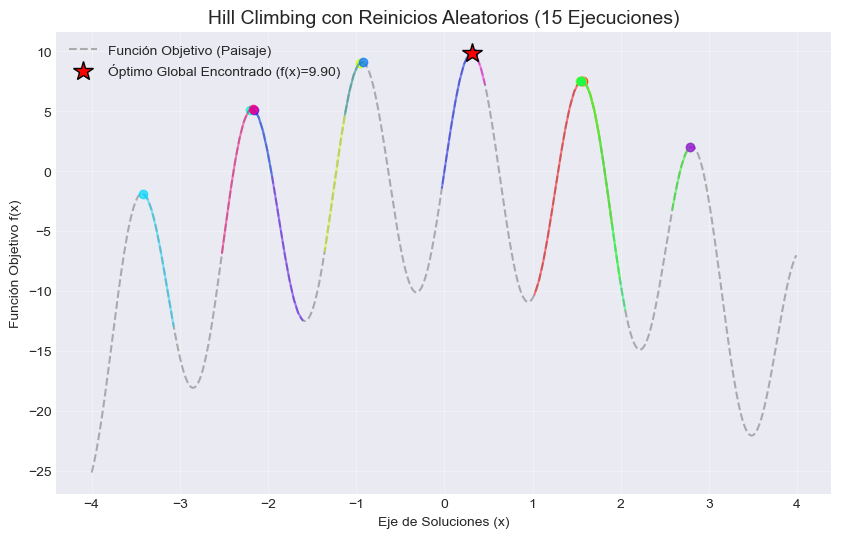


Resultado Global (RRHC): x = 0.3098, f(x) = 9.9016


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

# 1. Función Objetivo (el Paisaje)
def objective(x):
    # Función multimodal para ilustrar el problema del óptimo local
    return -(x**2) + 10 * math.sin(5 * x)

# 2. Función de Búsqueda Local (Hill Climbing simple)
def hill_climb_run(x0, step=0.05, iterations=100):
    x = x0
    path = [x]
    
    for _ in range(iterations):
        candidates = [x + step, x - step]
        scores = [objective(c) for c in candidates]
        best_candidate = candidates[np.argmax(scores)]
        
        if objective(best_candidate) > objective(x):
            x = best_candidate
            path.append(x)
        else:
            break
            
    return x, objective(x), path

# 3. Metaheurística: Hill Climbing con Reinicios Aleatorios (RRHC)
def random_restart_hill_climbing(num_restarts=15, search_range=(-3.5, 3.5)):
    best_x_global = None
    best_y_global = -np.inf  # Inicializar al mínimo negativo posible para maximización
    all_paths = []

    for r in range(num_restarts):
        # Elegir un punto de partida aleatorio
        x0 = random.uniform(search_range[0], search_range[1])
        
        # Ejecutar Hill Climbing desde ese punto
        x_final, y_final, path = hill_climb_run(x0)
        
        all_paths.append(path)
        
        # Actualizar el mejor global
        if y_final > best_y_global:
            best_y_global = y_final
            best_x_global = x_final
            
    return best_x_global, best_y_global, all_paths

# --- Ejecución y Visualización ---

# Parámetros y rangos
RANGO_X = np.arange(-4.0, 4.0, 0.01)
Y_PAISAJE = [objective(x) for x in RANGO_X]

# Ejecutar la metaheurística
best_x, best_y, all_paths = random_restart_hill_climbing(num_restarts=15)

# --- Gráfico ---
plt.figure(figsize=(10, 6))
plt.plot(RANGO_X, Y_PAISAJE, color='gray', linestyle='--', alpha=0.6, label='Función Objetivo (Paisaje)')

# FIX: Usar plt.colormaps.get_cmap para evitar el Deprecation Warning
cmap = plt.colormaps.get_cmap('hsv')
num_paths = len(all_paths)

for i, path in enumerate(all_paths):
    X_PATH = np.array(path)
    Y_PATH = np.array([objective(x) for x in X_PATH])
    
    # Calcular el color para este camino usando el mapa de color
    color = cmap(i / num_paths) 
    
    # Dibujar cada camino (más transparente)
    plt.plot(X_PATH, Y_PATH, linestyle='-', linewidth=1.5, color=color, alpha=0.5)
    
    # Punto final de cada ejecución (óptimo local)
    plt.plot(X_PATH[-1], Y_PATH[-1], 'o', markersize=6, color=color, alpha=0.7)

# Destacar el mejor punto global encontrado
plt.plot(best_x, best_y, 'r*', markersize=15, markeredgecolor='black', label=f'Óptimo Global Encontrado (f(x)={best_y:.2f})')

plt.title(f'Hill Climbing con Reinicios Aleatorios ({len(all_paths)} Ejecuciones)', fontsize=14)
plt.xlabel('Eje de Soluciones (x)')
plt.ylabel('Función Objetivo f(x)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

print(f"\nResultado Global (RRHC): x = {best_x:.4f}, f(x) = {best_y:.4f}")

El **Ascenso a la Colina con Reinicios Aleatorios** (**RRHC**) es una mejora directa y eficaz al Hill Climbing estándar:

- Ejecución Múltiple: El algoritmo ejecuta la búsqueda local simple ($HC$) varias veces (en este caso, 15 veces).
- Inicialización Diversa: Cada ejecución comienza desde un punto inicial elegido al azar dentro del espacio de búsqueda.
- Retención Global: Al final de todas las ejecuciones, el algoritmo selecciona la mejor solución de todos los óptimos locales encontrados.
- Impacto en la Exploración

Mientras que Hill Climbing solo realiza explotación (se mueve cuesta arriba), RRHC añade una capacidad de exploración global muy simple mediante la aleatoriedad de los puntos de partida. Si el número de reinicios es lo suficientemente grande, es muy probable que al menos una ejecución comience lo bastante cerca del óptimo global para alcanzarlo.

---


## 7. Simulated Annealing (SA) - Recocido Simulado

Simulated Annealing es el primer gran salto desde el Hill Climbing, inspirándose en el proceso de **enfriamiento de metales** (recocido) en metalurgia. Este proceso físico busca un estado de energía mínima (el óptimo global) mediante un enfriamiento lento y controlado.

### Comportamiento Clave
SA introduce un elemento de **Exploración** para escapar de los óptimos locales al permitir aceptar, con cierta probabilidad, **soluciones que son peores** que la actual (movimientos "cuesta abajo").

El control de este comportamiento se realiza mediante el parámetro **Temperatura ($T$)**:

* **Temperatura Alta (Inicio)**: La probabilidad de aceptar movimientos peores es alta. Se favorece la **Exploración** (movimientos arriesgados).
* **Temperatura Baja (Final)**: La probabilidad de aceptar movimientos peores es muy baja. Se favorece la **Explotación** local (movimientos conservadores).

### Regla de Aceptación (Metropolis)

El cambio de valor entre la solución candidata ($x_{candidato}$) y la actual ($x_{actual}$) se llama $\Delta = f(x_{candidato}) - f(x_{actual})$.

* Si $\Delta > 0$ (el movimiento es mejor), el movimiento **siempre se acepta**.
* Si $\Delta \le 0$ (el movimiento es peor, $\Delta$ es negativo), la probabilidad de aceptación está dada por la **Fórmula de Boltzmann**:

$$P(\text{aceptar}) = e^{\Delta / T}$$

Donde un $\Delta$ más pequeño (peor solución) o una $T$ más baja resultan en una probabilidad de aceptación menor. SA logra un equilibrio dinámico entre **exploración y explotación**.

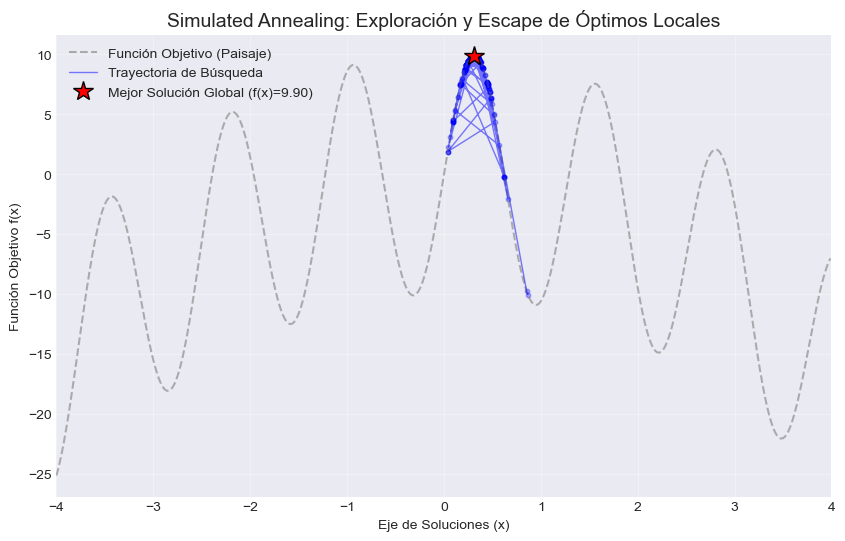


Resultado Final de Simulated Annealing: x = 0.3134, f(x) = 9.9017


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

# 1. Función Objetivo (el Paisaje)
def objective(x):
    return -(x**2) + 10 * math.sin(5 * x)

# --- Configuración del Rango ---
RANGO_X_START = -4.0
RANGO_X_END = 4.0

# 2. Algoritmo Simulated Annealing (registra el camino)
def simulated_annealing_path_simple(x0, T_max=5.0, cooling=0.99, iterations=500, 
                                     perturbation_size=0.5):
    x = x0
    best = x
    T = T_max
    path_x = [x]
    
    for _ in range(iterations):
        candidate = x + random.uniform(-perturbation_size, perturbation_size)
        delta = objective(candidate) - objective(x)

        # Criterio de aceptación (Metropolis)
        if delta > 0 or math.exp(delta / T) > random.random():
            x = candidate
        
        if objective(x) > objective(best):
            best = x
        
        T *= cooling
        path_x.append(x)
            
    return best, objective(best), path_x

# --- Ejecución y Visualización ---

# Cálculo del paisaje
RANGO_X = np.arange(RANGO_X_START, RANGO_X_END, 0.01)
Y_PAISAJE = [objective(x) for x in RANGO_X]

# Inicialización acotada
PUNTO_INICIAL = random.uniform(RANGO_X_START, RANGO_X_END)

# Ejecutar el algoritmo
best_x_sa, best_y_sa, X_PATH = simulated_annealing_path_simple(x0=PUNTO_INICIAL)
Y_PATH = np.array([objective(x) for x in X_PATH])


# --- Gráfico ---
plt.figure(figsize=(10, 6))

# Dibujar el Paisaje
plt.plot(RANGO_X, Y_PAISAJE, color='gray', linestyle='--', alpha=0.6, label='Función Objetivo (Paisaje)')

# Camino de la solución actual (muestra los saltos de exploración)
# Utilizamos una línea muy fina para que se note la densidad del movimiento
plt.plot(X_PATH, Y_PATH, 'b-', markersize=2, linewidth=1, alpha=0.5, label='Trayectoria de Búsqueda')
plt.scatter(X_PATH, Y_PATH, s=10, c='b', alpha=0.3) # Puntos para enfatizar la naturaleza discreta

# Destacar el óptimo global encontrado
plt.plot(best_x_sa, best_y_sa, 'r*', markersize=15, markeredgecolor='black', 
         label=f'Mejor Solución Global (f(x)={best_y_sa:.2f})')

plt.title('Simulated Annealing: Exploración y Escape de Óptimos Locales', fontsize=14)
plt.xlabel('Eje de Soluciones (x)')
plt.ylabel('Función Objetivo f(x)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(RANGO_X_START, RANGO_X_END) 
plt.show()

print(f"\nResultado Final de Simulated Annealing: x = {best_x_sa:.4f}, f(x) = {best_y_sa:.4f}")

Aunque Simulated Annealing está diseñado para escapar de los óptimos locales, no garantiza encontrar el óptimo global; solo aumenta la probabilidad de encontrarlo, especialmente en comparación con Hill Climbing.

Si el algoritmo queda atrapado en una corrida particular, esto se debe a la naturaleza probabilística y a la configuración de sus parámetros clave:

### 1. El Calendario de Enfriamiento (Cooling Schedule)

Este es el factor más importante. El proceso de enfriamiento debe ser lo suficientemente lento para que, a temperaturas altas, el algoritmo tenga tiempo de explorar todo el paisaje y, a temperaturas bajas, el sistema se estabilice cerca del mejor pico.

**Problema de Enfriamiento Rápido**: Si el factor de enfriamiento (cooling = 0.99 en el código) es demasiado agresivo, la Temperatura ($T$) cae muy rápido. La probabilidad de aceptar un movimiento peor se vuelve casi cero prematuramente. Si el óptimo global está "protegido" por un valle profundo (un salto con $\Delta$ muy negativo), el algoritmo rechazará el salto necesario mientras está atrapado en un óptimo local cercano, comportándose de nuevo como un Hill Climbing.

### 2. Número de Iteraciones Insuficiente

Si el número de iterations (500 en el código) es bajo, el algoritmo puede terminar antes de que la temperatura haya descendido lo suficiente para forzar una explotación final intensa. Esto puede dejar la solución actual en un punto que no ha sido completamente optimizado.

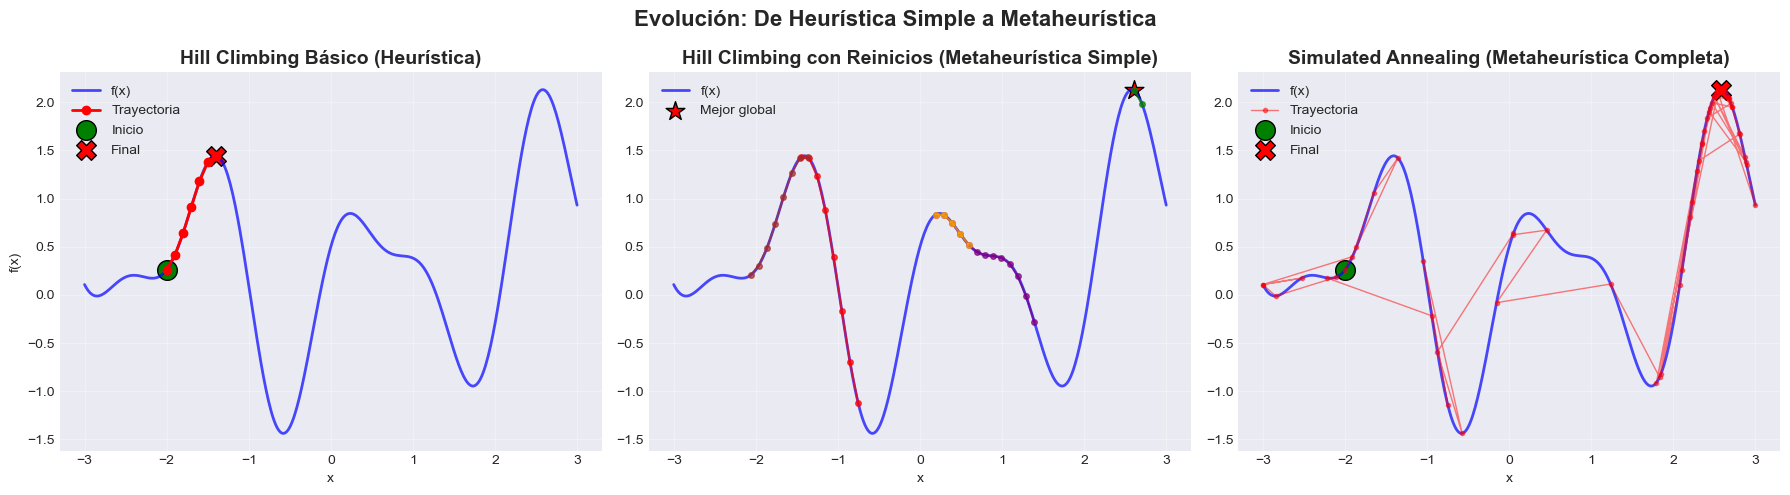


COMPARACIÓN CUANTITATIVA DE MÉTODOS

 RESULTADOS (promedio de 10 ejecuciones):
--------------------------------------------------
Hill Climbing básico:        Mejor=2.1071, Peor=0.2024, Promedio=0.7727
Hill Climbing + reinicios:   Mejor=2.8605, Peor=0.8389, Promedio=1.8116
Simulated Annealing:         Mejor=2.1315, Peor=0.8462, Promedio=1.3934

 CONCLUSIONES:
1. Hill Climbing básico es inconsistente: depende mucho del punto inicial
2. Los reinicios mejoran significativamente la consistencia
3. Simulated Annealing es más robusto pero más costoso computacionalmente

 REGLA PRÁCTICA: Empieza simple (Hill Climbing), luego añade complejidad según necesidad.


In [19]:
# EJEMPLO: EVOLUCIÓN DE HILL CLIMBING A METAHEURÍSTICAS
# ======================================================

# Definir función de prueba 1D (más simple para visualización)
def multimodal_1d(x):
    """Función 1D con múltiples óptimos locales."""
    return np.sin(3*x) + 0.5*np.cos(5*x) + 0.1*x**2

# 1. HILL CLIMBING BÁSICO
def hill_climb_basic(f, x0, step=0.1, max_iter=100):
    """Hill climbing simple: siempre subir."""
    x = x0
    history = [x]
    
    for i in range(max_iter):
        # Evaluar vecinos
        left = x - step
        right = x + step
        
        # Escoger el mejor
        if f(left) > f(right):
            x_new = left
        else:
            x_new = right
        
        # Solo mover si es mejor
        if f(x_new) > f(x):
            x = x_new
            history.append(x)
        else:
            break  # Óptimo local encontrado
            
    return x, f(x), history

# 2. HILL CLIMBING CON REINICIOS ALEATORIOS (metaheurística simple)
def hill_climb_with_restarts(f, bounds, num_restarts=5, step=0.1, iter_per_restart=50):
    """Hill climbing con múltiples reinicios aleatorios."""
    best_x = None
    best_value = -np.inf
    all_histories = []
    
    for restart in range(num_restarts):
        # Punto inicial aleatorio
        x0 = np.random.uniform(bounds[0], bounds[1])
        x, value, history = hill_climb_basic(f, x0, step, iter_per_restart)
        
        all_histories.append(history)
        
        if value > best_value:
            best_value = value
            best_x = x
            
    return best_x, best_value, all_histories

# 3. SIMULATED ANNEALING (metaheurística más sofisticada)
def simulated_annealing_1d(f, x0, bounds, max_iter=200, temp_init=10, cooling=0.95):
    """Simulated annealing para 1D."""
    x = x0
    current_value = f(x)
    history = [x]
    temp = temp_init
    
    for i in range(max_iter):
        # Generar vecino aleatorio
        x_new = x + np.random.normal(0, 0.5)
        x_new = np.clip(x_new, bounds[0], bounds[1])
        new_value = f(x_new)
        
        # Decidir si aceptar
        delta = new_value - current_value
        if delta > 0 or np.random.random() < np.exp(delta / temp):
            x = x_new
            current_value = new_value
            history.append(x)
        
        # Enfriar
        temp *= cooling
        
    return x, current_value, history

# VISUALIZACIÓN COMPARATIVA
# =========================
x_vals = np.linspace(-3, 3, 400)
y_vals = multimodal_1d(x_vals)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Evolución: De Heurística Simple a Metaheurística', fontsize=16, fontweight='bold')

# Gráfico 1: Hill Climbing básico
axes[0].plot(x_vals, y_vals, 'b-', linewidth=2, alpha=0.7, label='f(x)')
x0 = -2.0
best_x, best_val, history = hill_climb_basic(multimodal_1d, x0)
axes[0].plot(history, [multimodal_1d(x) for x in history], 'ro-', 
             linewidth=2, markersize=6, label='Trayectoria')
axes[0].scatter([x0], [multimodal_1d(x0)], s=200, color='green', 
                marker='o', edgecolor='black', label='Inicio')
axes[0].scatter([best_x], [best_val], s=200, color='red', 
                marker='X', edgecolor='black', label='Final')
axes[0].set_title('Hill Climbing Básico (Heurística)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('x')
axes[0].set_ylabel('f(x)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Gráfico 2: Hill Climbing con reinicios
axes[1].plot(x_vals, y_vals, 'b-', linewidth=2, alpha=0.7, label='f(x)')
best_x_r, best_val_r, all_histories = hill_climb_with_restarts(multimodal_1d, (-3, 3), 5)

colors = ['red', 'green', 'purple', 'orange', 'brown']
for i, history in enumerate(all_histories):
    axes[1].plot(history, [multimodal_1d(x) for x in history], 'o-', 
                 color=colors[i], linewidth=1.5, markersize=4, alpha=0.7)
axes[1].scatter([best_x_r], [best_val_r], s=200, color='red', 
                marker='*', edgecolor='black', label='Mejor global')
axes[1].set_title('Hill Climbing con Reinicios (Metaheurística Simple)', 
                  fontsize=14, fontweight='bold')
axes[1].set_xlabel('x')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Gráfico 3: Simulated Annealing
axes[2].plot(x_vals, y_vals, 'b-', linewidth=2, alpha=0.7, label='f(x)')
best_x_sa, best_val_sa, history_sa = simulated_annealing_1d(multimodal_1d, -2.0, (-3, 3))
axes[2].plot(history_sa, [multimodal_1d(x) for x in history_sa], 'ro-', 
             linewidth=1, markersize=3, alpha=0.5, label='Trayectoria')
axes[2].scatter([-2.0], [multimodal_1d(-2.0)], s=200, color='green', 
                marker='o', edgecolor='black', label='Inicio')
axes[2].scatter([best_x_sa], [best_val_sa], s=200, color='red', 
                marker='X', edgecolor='black', label='Final')
axes[2].set_title('Simulated Annealing (Metaheurística Completa)', 
                  fontsize=14, fontweight='bold')
axes[2].set_xlabel('x')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ANÁLISIS CUANTITATIVO
print("\n" + "="*80)
print("COMPARACIÓN CUANTITATIVA DE MÉTODOS")
print("="*80)

# Evaluar cada método 10 veces desde diferentes puntos iniciales
def evaluate_method(method, method_name, trials=10):
    results = []
    for _ in range(trials):
        x0 = np.random.uniform(-3, 3)
        if method_name == "Hill Climbing":
            x, val, _ = hill_climb_basic(multimodal_1d, x0)
        elif method_name == "Hill Climbing con Reinicios":
            x, val, _ = hill_climb_with_restarts(multimodal_1d, (-3, 3), 3)
        else:  # Simulated Annealing
            x, val, _ = simulated_annealing_1d(multimodal_1d, x0, (-3, 3))
        results.append(val)
    
    return np.array(results)

# Evaluar
hc_results = evaluate_method(hill_climb_basic, "Hill Climbing")
hcr_results = evaluate_method(hill_climb_with_restarts, "Hill Climbing con Reinicios")
sa_results = evaluate_method(simulated_annealing_1d, "Simulated Annealing")

# Mostrar resultados
print("\n RESULTADOS (promedio de 10 ejecuciones):")
print("-" * 50)
print(f"Hill Climbing básico:        Mejor={hc_results.max():.4f}, Peor={hc_results.min():.4f}, Promedio={hc_results.mean():.4f}")
print(f"Hill Climbing + reinicios:   Mejor={hcr_results.max():.4f}, Peor={hcr_results.min():.4f}, Promedio={hcr_results.mean():.4f}")
print(f"Simulated Annealing:         Mejor={sa_results.max():.4f}, Peor={sa_results.min():.4f}, Promedio={sa_results.mean():.4f}")

print("\n CONCLUSIONES:")
print("1. Hill Climbing básico es inconsistente: depende mucho del punto inicial")
print("2. Los reinicios mejoran significativamente la consistencia")
print("3. Simulated Annealing es más robusto pero más costoso computacionalmente")
print("\n REGLA PRÁCTICA: Empieza simple (Hill Climbing), luego añade complejidad según necesidad.")

## Ejercicio 3: Mejora tu Propio Hill Climbing

**Objetivo:** Implementar mejoras a un algoritmo básico de Hill Climbing.

**Instrucciones:**
1. Usa la función `hill_climb_basic` como punto de partida
2. Implementa AL MENOS DOS de las siguientes mejoras:
   - **Mejora 1:** Tamaño de paso adaptativo (empezar grande, reducir)
   - **Mejora 2:** Búsqueda estocástica (elegir vecino aleatorio, no siempre el mejor)
   - **Mejora 3:** Búsqueda en múltiples direcciones simultáneas
   - **Mejora 4:** Memoria de pasos anteriores para evitar ciclos
3. Evalúa tu mejora con la función `multimodal_1d`
4. Compara con el método original

**Código base:**


🔍 PRUEBA DE TU ALGORITMO:
Punto inicial: x = -0.8568, f(x) = -0.6747
Punto final:   x = -1.4046, f(x) = 1.4448
Iteraciones: 7


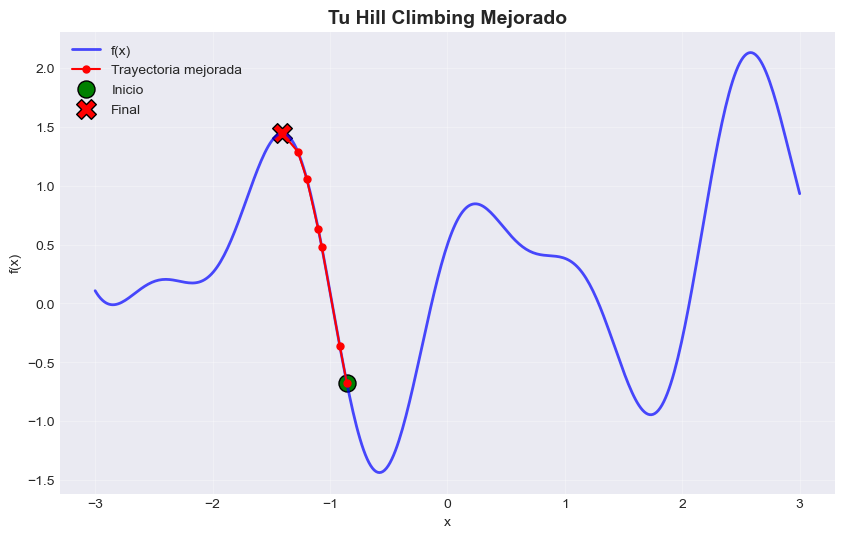


 COMPARACIÓN CON HILL CLIMBING BÁSICO:
--------------------------------------------------
Mismo punto inicial: x = -0.8568

Hill Climbing básico:
  • Valor final: 1.4241
  • Iteraciones: 7

Tu Hill Climbing mejorado:
  • Valor final: 1.4449
  • Iteraciones: 5

 ¡TU MEJORA FUNCIONA! Encontraste un valor 1.5% mejor.


In [21]:
# ESPACIO PARA EL EJERCICIO 3
# ============================

def hill_climb_mejorado(f, x0, step=0.1, max_iter=100):
    """
    TU VERSIÓN MEJORADA DE HILL CLIMBING
    Implementa al menos dos mejoras mencionadas arriba
    """
    # TU CÓDIGO AQUÍ
    x = x0
    history = [x]
    
    # Mejora 1: Paso adaptativo
    step_actual = step * 2  # Empezar con paso más grande
    
    for i in range(max_iter):
        # Reducir paso gradualmente
        step_actual = step_actual * 0.95  # Reducción del 5% por iteración
        
        # Mejora 2: Evaluar múltiples direcciones aleatorias
        num_direcciones = 5
        direcciones = []
        
        for _ in range(num_direcciones):
            # Dirección aleatoria entre -step_actual y step_actual
            delta = np.random.uniform(-step_actual, step_actual)
            direcciones.append(x + delta)
        
        # Evaluar todas las direcciones
        valores = [f(d) for d in direcciones]
        mejor_idx = np.argmax(valores)
        x_nuevo = direcciones[mejor_idx]
        
        # Solo mover si es mejor
        if f(x_nuevo) > f(x):
            x = x_nuevo
            history.append(x)
        else:
            # Mejora 3: Aceptación probabilística ocasional
            if np.random.random() < 0.1:  # 10% de probabilidad de aceptar peor solución
                x = x_nuevo
                history.append(x)
            else:
                break
    
    return x, f(x), history

# PRUEBA TU ALGORITMO
x_test = np.random.uniform(-3, 3)
x_best, val_best, hist = hill_climb_mejorado(multimodal_1d, x_test)

print(f"\n🔍 PRUEBA DE TU ALGORITMO:")
print(f"Punto inicial: x = {x_test:.4f}, f(x) = {multimodal_1d(x_test):.4f}")
print(f"Punto final:   x = {x_best:.4f}, f(x) = {val_best:.4f}")
print(f"Iteraciones: {len(hist)}")

# Visualización
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x_vals, y_vals, 'b-', linewidth=2, alpha=0.7, label='f(x)')
ax.plot(hist, [multimodal_1d(x) for x in hist], 'ro-', 
        linewidth=1.5, markersize=5, label='Trayectoria mejorada')
ax.scatter([x_test], [multimodal_1d(x_test)], s=150, 
           color='green', marker='o', edgecolor='black', label='Inicio')
ax.scatter([x_best], [val_best], s=200, 
           color='red', marker='X', edgecolor='black', label='Final')
ax.set_title('Tu Hill Climbing Mejorado', fontsize=14, fontweight='bold')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()

# COMPARACIÓN CON EL ORIGINAL
print("\n COMPARACIÓN CON HILL CLIMBING BÁSICO:")
print("-" * 50)

# Ejecutar ambos métodos desde el MISMO punto inicial
x_orig, val_orig, hist_orig = hill_climb_basic(multimodal_1d, x_test)
x_mej, val_mej, hist_mej = hill_climb_mejorado(multimodal_1d, x_test)

print(f"Mismo punto inicial: x = {x_test:.4f}")
print(f"\nHill Climbing básico:")
print(f"  • Valor final: {val_orig:.4f}")
print(f"  • Iteraciones: {len(hist_orig)}")

print(f"\nTu Hill Climbing mejorado:")
print(f"  • Valor final: {val_mej:.4f}")
print(f"  • Iteraciones: {len(hist_mej)}")

if val_mej > val_orig:
    print(f"\n ¡TU MEJORA FUNCIONA! Encontraste un valor {100*(val_mej-val_orig)/val_orig:.1f}% mejor.")
else:
    print(f"\n Tu mejora no superó al original. Sigue intentando... y no regreses si no lo logras ;-)")

# 8. Problemas NP-duros y Paisajes de Búsqueda en Ciencia de Datos

### ¿Qué son los Problemas NP-duros?

**Definición simplificada:** Problemas donde el tiempo de solución crece **exponencialmente** con el tamaño, pero verificar una solución es rápido.

**En ciencia de datos:** Muchas tareas importantes son NP-duros:

| Problema en Ciencia de Datos | Tamaño del Espacio de Búsqueda | Por qué es NP-duro |
|-------------------------------|--------------------------------|-------------------|
| **Selección óptima de k de n features** | C(n,k) combinaciones | Crecimiento combinatorio |
| **Clustering óptimo con restricciones** | Número de Stirling del 2do tipo | Particiones exponenciales |
| **Neural Architecture Search** | Grafos arquitectónicos posibles | Espacio combinatorio enorme |
| **Optimización de hiperparámetros mixtos** | Producto de dominios discretos y continuos | No convexo, multimodal |
| **Problema del vendedor viajero (TSP)** | (n-1)! rutas posibles | Crecimiento factorial |

En todos estos casos, el costo principal no reside en evaluar una solución, sino en decidir **qué soluciones vale la pena evaluar**.

### Características de Paisajes de Búsqueda en Problemas NP-duros

La dificultad de estos problemas no se explica únicamente por el tamaño del espacio de soluciones, sino por su estructura interna. Esta estructura se describe mediante el concepto de **paisaje de búsqueda**, que relaciona cada solución candidata con un valor de calidad o *fitness*.

1. **Multimodalidad extrema:** Muchos óptimos locales de calidad similar
2. **Mesetas y "escaleras":** Regiones planas donde no hay gradiente
3. **Dependencia epistática:** Variables interactúan de forma compleja
4. **Cardinalidad explosiva:** El espacio crece exponencialmente
5. **Rugosidad:** Pequeños cambios en la solución producen grandes cambios en fitness

### Experimento: Explorando un Espacio Combinatorio Pequeño

Para hacer explícitas estas ideas, comenzamos analizando uno de los casos más simples y comunes en ciencia de datos: la **selección de variables**.

Dado un conjunto de \( n \) variables, consideramos el problema de seleccionar exactamente \( k \) de ellas. El tamaño del espacio de búsqueda viene dado por el coeficiente binomial: $\binom{n}{k}$

Este crecimiento combinatorio será el punto de partida para el resto del análisis.

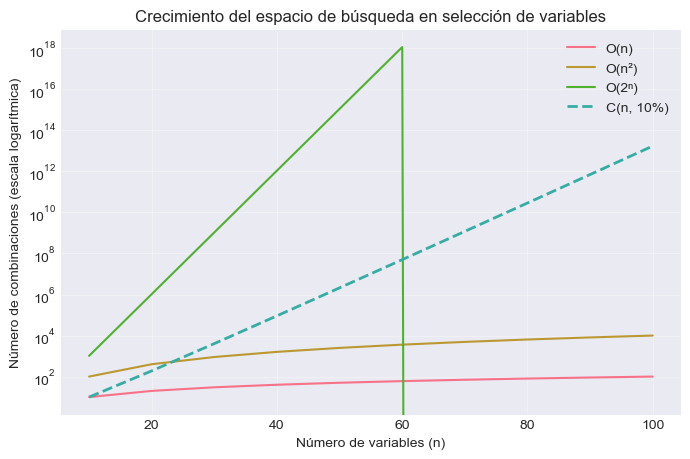

In [33]:
import math
import numpy as np
import matplotlib.pyplot as plt

def num_combinaciones(n, k):
    """Número de formas de elegir k elementos de un conjunto de tamaño n."""
    return math.comb(n, k)

# Rango de número de variables
ns = np.arange(10, 101, 10)

# Fracción fija de variables seleccionadas
k_fraction = 0.1

combinaciones = []
for n in ns:
    k = int(n * k_fraction)
    combinaciones.append(num_combinaciones(n, k))

# Comparación con otros órdenes de crecimiento
plt.figure(figsize=(8, 5))
plt.plot(ns, ns, label="O(n)")
plt.plot(ns, ns**2, label="O(n²)")
plt.plot(ns, 2**ns, label="O(2ⁿ)")
plt.plot(ns, combinaciones, linestyle="--", linewidth=2,
         label=f"C(n, {int(k_fraction*100)}%)")

plt.yscale("log")
plt.xlabel("Número de variables (n)")
plt.ylabel("Número de combinaciones (escala logarítmica)")
plt.title("Crecimiento del espacio de búsqueda en selección de variables")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


Este gráfico permite comparar el crecimiento combinatorio asociado a la selección de variables con órdenes de complejidad más familiares.

Incluso cuando se selecciona solo una fracción fija del total de variables, el número de combinaciones crece de forma comparable a una función exponencial. A partir de valores moderados de \( n \), la exploración exhaustiva del espacio se vuelve impracticable.

Este resultado no depende del modelo de aprendizaje, del método de evaluación ni del hardware disponible. Es una consecuencia directa de la estructura del problema.


### Un caso límite: selección de 5 variables entre 20

Para comprender de forma concreta las implicaciones del crecimiento combinatorio, analizamos ahora un caso específico que se sitúa en el límite de lo computacionalmente tratable mediante búsqueda exhaustiva.

Consideremos un conjunto de \( n = 20 \) variables y el problema de seleccionar exactamente \( k = 5 \) de ellas. El tamaño del espacio de búsqueda viene dado por: $\binom{20}{5} = 15\,504$. 

Este número es suficientemente pequeño para permitir una exploración exhaustiva completa, pero lo bastante grande como para anticipar los problemas que aparecen al incrementar ligeramente el tamaño del sistema. 

En este sentido, este ejemplo debe entenderse como un **caso frontera**: más pequeño que un problema realista, pero estructuralmente similar a ellos.

En este escenario es posible generar todas las combinaciones posibles de cinco variables y evaluarlas una a una. Esta capacidad nos permite conocer el valor óptimo global del problema y utilizarlo como referencia. En problemas reales, este tipo de conocimiento no está disponible.


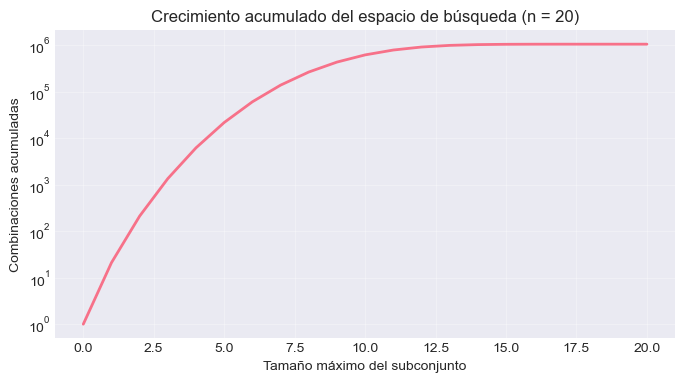

In [52]:
import numpy as np

ks = range(0, n + 1)
valores = np.array([math.comb(n, k) for k in ks])
acumulado = np.cumsum(valores)

plt.figure(figsize=(8, 4))
plt.plot(ks, acumulado, linewidth=2)
plt.yscale("log")
plt.xlabel("Tamaño máximo del subconjunto")
plt.ylabel("Combinaciones acumuladas")
plt.title("Crecimiento acumulado del espacio de búsqueda (n = 20)")
plt.grid(True, alpha=0.3)
plt.show()


Problema:
Seleccionar 5 características de un total de 20
Tamaño del espacio de búsqueda: C(20,5) = 15,504

Fuerza bruta:
  Mejor subconjunto: (1, 3, 8, 11, 12)
  Score óptimo global: 6.4070
  Evaluaciones realizadas: 15504

Hill Climbing:
  Subconjunto encontrado: (1, 3, 8, 11, 12)
  Mejor score encontrado: 6.4070
  Evaluaciones realizadas: 1001

Comparación:
  Óptimo global (fuerza bruta): 6.4070
  Hill climbing:               6.4070

  Evaluaciones fuerza bruta:   15504
  Evaluaciones hill climbing:  1001


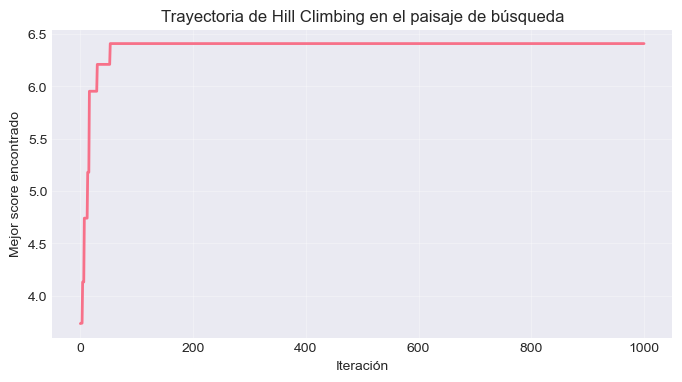

In [54]:
# ============================================================
# Comparación empírica: Fuerza Bruta vs Hill Climbing
# Selección de características en un espacio combinatorio
# ============================================================

import numpy as np
import math
from itertools import combinations
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# 1. Definición del problema
# ------------------------------------------------------------

np.random.seed(42)

n = 20          # número total de características
k = 5           # número de características a seleccionar

# Importancia individual de cada característica
importancias = np.random.rand(n)

# Interacciones (epistasis) entre pares de características
sinergias = np.random.rand(n, n) * 0.3
np.fill_diagonal(sinergias, 0)

def evaluar_subconjunto(indices):
    """Función objetivo: importancia individual + interacciones"""
    score = importancias[list(indices)].sum()
    for i in range(len(indices)):
        for j in range(i + 1, len(indices)):
            score += sinergias[indices[i], indices[j]]
    return score

print("Problema:")
print(f"Seleccionar {k} características de un total de {n}")
print(f"Tamaño del espacio de búsqueda: C({n},{k}) = {math.comb(n,k):,}")
print()

# ------------------------------------------------------------
# 2. Resolución por fuerza bruta (óptimo global)
# ------------------------------------------------------------

mejor_score_fb = -np.inf
mejor_subset_fb = None
evaluaciones_fb = 0

for subset in combinations(range(n), k):
    score = evaluar_subconjunto(subset)
    evaluaciones_fb += 1
    if score > mejor_score_fb:
        mejor_score_fb = score
        mejor_subset_fb = subset

print("Fuerza bruta:")
print(f"  Mejor subconjunto: {mejor_subset_fb}")
print(f"  Score óptimo global: {mejor_score_fb:.4f}")
print(f"  Evaluaciones realizadas: {evaluaciones_fb}")
print()

# ------------------------------------------------------------
# 3. Hill Climbing (búsqueda local)
# ------------------------------------------------------------

def hill_climbing(n, k, max_iter=1000):
    # Solución inicial aleatoria con exactamente k unos
    solucion = np.zeros(n, dtype=int)
    solucion[np.random.choice(n, k, replace=False)] = 1

    def score(sol):
        return evaluar_subconjunto(np.where(sol == 1)[0])

    mejor_score = score(solucion)
    evaluaciones = 1
    historia = [mejor_score]

    for _ in range(max_iter):
        seleccionados = np.where(solucion == 1)[0]
        no_seleccionados = np.where(solucion == 0)[0]

        out = np.random.choice(seleccionados)
        inn = np.random.choice(no_seleccionados)

        vecino = solucion.copy()
        vecino[out] = 0
        vecino[inn] = 1

        s_vecino = score(vecino)
        evaluaciones += 1

        if s_vecino > mejor_score:
            solucion = vecino
            mejor_score = s_vecino

        historia.append(mejor_score)

    return solucion, mejor_score, evaluaciones, historia

sol_hc, score_hc, evals_hc, hist_hc = hill_climbing(n, k)

print("Hill Climbing:")
print(f"  Subconjunto encontrado: {tuple(np.where(sol_hc == 1)[0])}")
print(f"  Mejor score encontrado: {score_hc:.4f}")
print(f"  Evaluaciones realizadas: {evals_hc}")
print()

# ------------------------------------------------------------
# 4. Comparación directa
# ------------------------------------------------------------

print("Comparación:")
print(f"  Óptimo global (fuerza bruta): {mejor_score_fb:.4f}")
print(f"  Hill climbing:               {score_hc:.4f}")
print()
print(f"  Evaluaciones fuerza bruta:   {evaluaciones_fb}")
print(f"  Evaluaciones hill climbing:  {evals_hc}")

# ------------------------------------------------------------
# 5. Trayectoria de búsqueda de hill climbing
# ------------------------------------------------------------

plt.figure(figsize=(8, 4))
plt.plot(hist_hc, linewidth=2)
plt.xlabel("Iteración")
plt.ylabel("Mejor score encontrado")
plt.title("Trayectoria de Hill Climbing en el paisaje de búsqueda")
plt.grid(True, alpha=0.3)
plt.show()


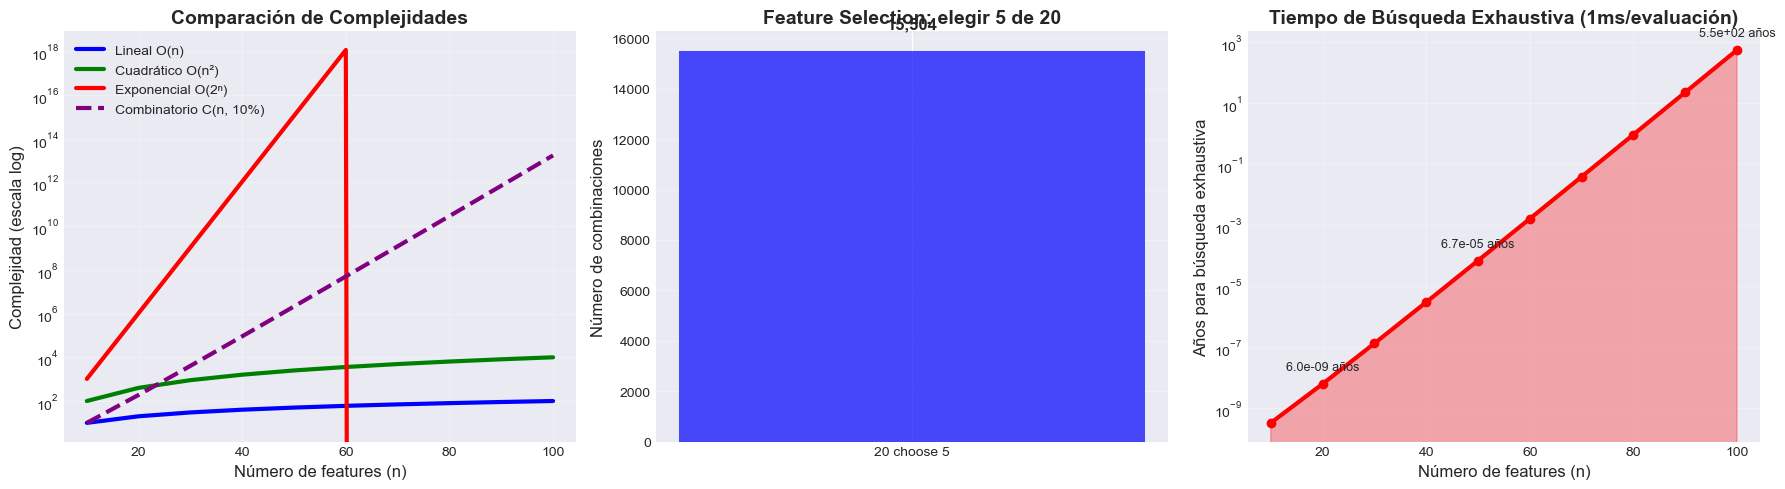


EJEMPLO PRÁCTICO: BÚSQUEDA EN ESPACIO COMBINATORIO

Problema: Seleccionar 5 de 20 features
Número de combinaciones: 15,504

  Demasiadas combinaciones para búsqueda exhaustiva.
Necesitamos metaheurísticas para explorar este espacio eficientemente.

 Usando metaheurística simple (Hill Climbing binario):

 Metaheurística encontró: (1, 3, 8, 11, 12)
Score: 6.4070
Iteraciones: 103


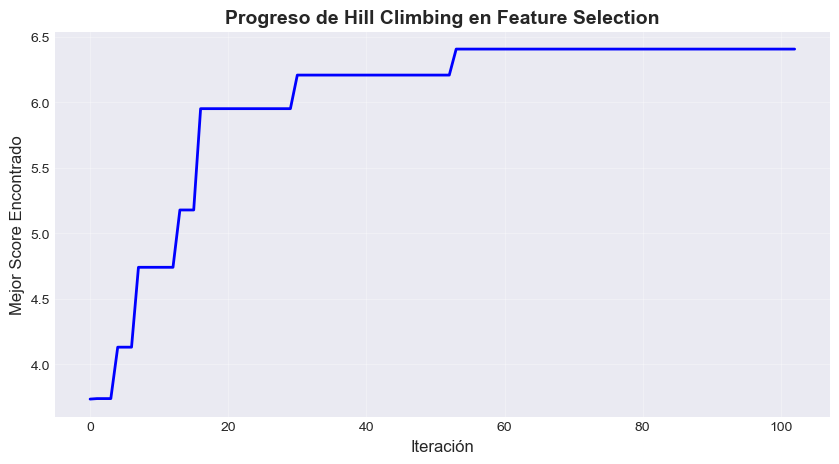


CONCLUSIÓN:
1. Los espacios combinatorios crecen exponencialmente
2. La búsqueda exhaustiva es imposible para problemas reales
3. Las metaheurísticas encuentran soluciones buenas en tiempo razonable


In [29]:
# EXPERIMENTO: COMPLEJIDAD COMBINATORIA EN FEATURE SELECTION
# ==========================================================

import math
from itertools import combinations

# Función para calcular número de combinaciones
def num_combinaciones(n, k):
    """Número de formas de elegir k elementos de n."""
    return math.comb(n, k)

# Visualizar crecimiento combinatorio
ns = np.arange(10, 101, 10)  # De 10 a 100 features
k_fraction = 0.1  # Seleccionar 10% de features

combinaciones = []
for n in ns:
    k = int(n * k_fraction)
    comb = num_combinaciones(n, k)
    combinaciones.append(comb)

# Crear visualización
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Gráfico 1: Crecimiento lineal vs combinatorio
axes[0].plot(ns, ns, 'b-', linewidth=3, label='Lineal O(n)')
axes[0].plot(ns, ns**2, 'g-', linewidth=3, label='Cuadrático O(n²)')
axes[0].plot(ns, 2**ns, 'r-', linewidth=3, label='Exponencial O(2ⁿ)')
axes[0].plot(ns, combinaciones, 'purple', linewidth=3, linestyle='--', 
            label=f'Combinatorio C(n, {k_fraction*100:.0f}%)')
axes[0].set_xlabel('Número de features (n)', fontsize=12)
axes[0].set_ylabel('Complejidad (escala log)', fontsize=12)
axes[0].set_title('Comparación de Complejidades', fontsize=14, fontweight='bold')
axes[0].set_yscale('log')
axes[0].legend(loc='upper left', fontsize=10)
axes[0].grid(True, alpha=0.3)

# Gráfico 2: Ejemplo concreto para n=20
n_ejemplo = 20
k_ejemplo = 5
combinaciones_20 = num_combinaciones(n_ejemplo, k_ejemplo)

axes[1].bar(['20 choose 5'], [combinaciones_20], color='blue', alpha=0.7)
axes[1].set_ylabel('Número de combinaciones', fontsize=12)
axes[1].set_title(f'Feature Selection: elegir {k_ejemplo} de {n_ejemplo}', 
                 fontsize=14, fontweight='bold')
axes[1].text(0, combinaciones_20*1.05, f'{combinaciones_20:,}', 
            ha='center', va='bottom', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

# Gráfico 3: Tiempo estimado de búsqueda exhaustiva
tiempo_por_evaluacion = 0.001  # 1ms por evaluación (optimista)
tiempos = [c * tiempo_por_evaluacion / (3600*24*365) for c in combinaciones]  # Años

axes[2].plot(ns, tiempos, 'r-', linewidth=3, marker='o')
axes[2].fill_between(ns, 0, tiempos, alpha=0.3, color='red')
axes[2].set_xlabel('Número de features (n)', fontsize=12)
axes[2].set_ylabel('Años para búsqueda exhaustiva', fontsize=12)
axes[2].set_title('Tiempo de Búsqueda Exhaustiva (1ms/evaluación)', 
                 fontsize=14, fontweight='bold')
axes[2].set_yscale('log')
axes[2].grid(True, alpha=0.3)

# Anotar valores específicos
for n, t in zip([20, 50, 100], [tiempos[1], tiempos[4], tiempos[-1]]):
    axes[2].annotate(f'{t:.1e} años', (n, t), textcoords="offset points", 
                    xytext=(0,10), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# EJEMPLO PRÁCTICO: BÚSQUEDA EN ESPACIO COMBINATORIO PEQUEÑO
print("\n" + "="*80)
print("EJEMPLO PRÁCTICO: BÚSQUEDA EN ESPACIO COMBINATORIO")
print("="*80)

# Simular un problema de feature selection con 20 features
np.random.seed(42)
n_features = 20
k_select = 5

# Asignar "importancia" aleatoria a cada feature
importancias = np.random.rand(n_features)
# Añadir algunas interacciones (sinergias)
sinergias = np.random.rand(n_features, n_features) * 0.3
np.fill_diagonal(sinergias, 0)  # No sinergia consigo mismo

# Función de evaluación (simplificada)
def evaluar_subconjunto(subconjunto):
    """Evalúa un subconjunto de features."""
    indices = list(subconjunto)
    
    # Importancia individual
    score_individual = importancias[indices].sum()
    
    # Sinergias entre pares
    score_sinergia = 0
    for i in range(len(indices)):
        for j in range(i+1, len(indices)):
            score_sinergia += sinergias[indices[i], indices[j]]
    
    return score_individual + score_sinergia

# Búsqueda exhaustiva (solo para ejemplo pequeño)
print(f"\nProblema: Seleccionar {k_select} de {n_features} features")
print(f"Número de combinaciones: {num_combinaciones(n_features, k_select):,}")

if num_combinaciones(n_features, k_select) < 10000:  # Solo si es manejable
    mejor_score = -np.inf
    mejor_subconjunto = None
    
    print("\nRealizando búsqueda exhaustiva...")
    
    for subset in combinations(range(n_features), k_select):
        score = evaluar_subconjunto(subset)
        if score > mejor_score:
            mejor_score = score
            mejor_subconjunto = subset
    
    print(f"\n Mejor subconjunto encontrado: {mejor_subconjunto}")
    print(f"Score: {mejor_score:.4f}")
else:
    print("\n  Demasiadas combinaciones para búsqueda exhaustiva.")
    print("Necesitamos metaheurísticas para explorar este espacio eficientemente.")

# Búsqueda con metaheurística simple (Hill Climbing en espacio binario)
print("\n Usando metaheurística simple (Hill Climbing binario):")

def hill_climb_binario(n, k, max_iter=1000):
    """Hill climbing para selección de features (espacio binario)."""
    # Inicializar solución aleatoria con exactamente k unos
    solucion = np.zeros(n, dtype=int)
    indices = np.random.choice(n, k, replace=False)
    solucion[indices] = 1
    
    mejor_score = evaluar_subconjunto(np.where(solucion == 1)[0])
    historia = [mejor_score]
    
    for iteracion in range(max_iter):
        # Generar vecino: intercambiar un feature seleccionado por uno no seleccionado
        seleccionados = np.where(solucion == 1)[0]
        no_seleccionados = np.where(solucion == 0)[0]
        
        if len(seleccionados) == 0 or len(no_seleccionados) == 0:
            break
        
        # Elegir random
        out_idx = np.random.choice(seleccionados)
        in_idx = np.random.choice(no_seleccionados)
        
        # Crear vecino
        vecino = solucion.copy()
        vecino[out_idx] = 0
        vecino[in_idx] = 1
        
        # Evaluar
        score_vecino = evaluar_subconjunto(np.where(vecino == 1)[0])
        
        # Aceptar si es mejor
        if score_vecino > mejor_score:
            solucion = vecino
            mejor_score = score_vecino
        
        historia.append(mejor_score)
        
        # Criterio de parada simple
        if iteracion > 50 and len(set(historia[-50:])) == 1:
            break
    
    return solucion, mejor_score, historia

# Ejecutar metaheurística
sol_hc, score_hc, hist_hc = hill_climb_binario(n_features, k_select)
subconjunto_hc = np.where(sol_hc == 1)[0]

print(f"\n Metaheurística encontró: {tuple(subconjunto_hc)}")
print(f"Score: {score_hc:.4f}")
print(f"Iteraciones: {len(hist_hc)}")

# Visualizar progreso
plt.figure(figsize=(10, 5))
plt.plot(hist_hc, 'b-', linewidth=2)
plt.xlabel('Iteración', fontsize=12)
plt.ylabel('Mejor Score Encontrado', fontsize=12)
plt.title('Progreso de Hill Climbing en Feature Selection', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

print("\nCONCLUSIÓN:")
print("1. Los espacios combinatorios crecen exponencialmente")
print("2. La búsqueda exhaustiva es imposible para problemas reales")
print("3. Las metaheurísticas encuentran soluciones buenas en tiempo razonable")

# 9. Sistemas Adaptativos Complejos como Inspiración

### Más Allá de la Simple Biomímesis

Las metaheurísticas modernas ya no solo imitan insectos o metales enfriándose. Se inspiran en **principios de sistemas adaptativos complejos**:

| Principio de Sistema Complejo | Metaheurística que lo Implementa | Beneficio |
|--------------------------------|----------------------------------|----------|
| **Auto-organización** | Enjambres de partículas (PSO) | Orden emerge de reglas simples |
| **Emergencia** | Colonias de hormigas (ACO) | Comportamiento colectivo inteligente |
| **Retroalimentación positiva/negativa** | Algoritmos genéticos | Balance exploración/explotación |
| **Diversidad y especialización** | Algoritmos meméticos | Nichos, especialización local |
| **Resiliencia** | Simulated annealing | Escapa de óptimos locales |
| **Aprendizaje colectivo** | Estimation of Distribution Algorithms | Modelo compartido del paisaje |

### Principio Unificador
Fórmula de Sistemas Adaptativos Exitosos:

**DIVERSIDAD + INTERACCIÓN + ADAPTACIÓN = BÚSQUEDA EFECTIVA**

<p>Donde:</p>
<ul>
  <li><strong>DIVERSIDAD</strong>: Múltiples soluciones explorando diferentes regiones</li>
  <li><strong>INTERACCIÓN</strong>: Compartir información entre soluciones</li>
  <li><strong>ADAPTACIÓN</strong>: Ajustar estrategia basado en experiencia</li>
</ul>
</div>

### Simulación: Movimiento Colectivo en un Paisaje

Iniciando simulación de sistema colectivo adaptativo...
Agentes: 30, Pasos: 100
Mejor inicial: f(0.61, 1.25) = -0.5376
Paso  20: Mejor global = -1.000117
Paso  40: Mejor global = -1.000840
Paso  60: Mejor global = -1.000840
Paso  80: Mejor global = -1.000840
Paso 100: Mejor global = -1.001088

Simulación completada.
Mejor final: f(-0.5603, 0.0160) = -1.001088


NameError: name 'X_s' is not defined

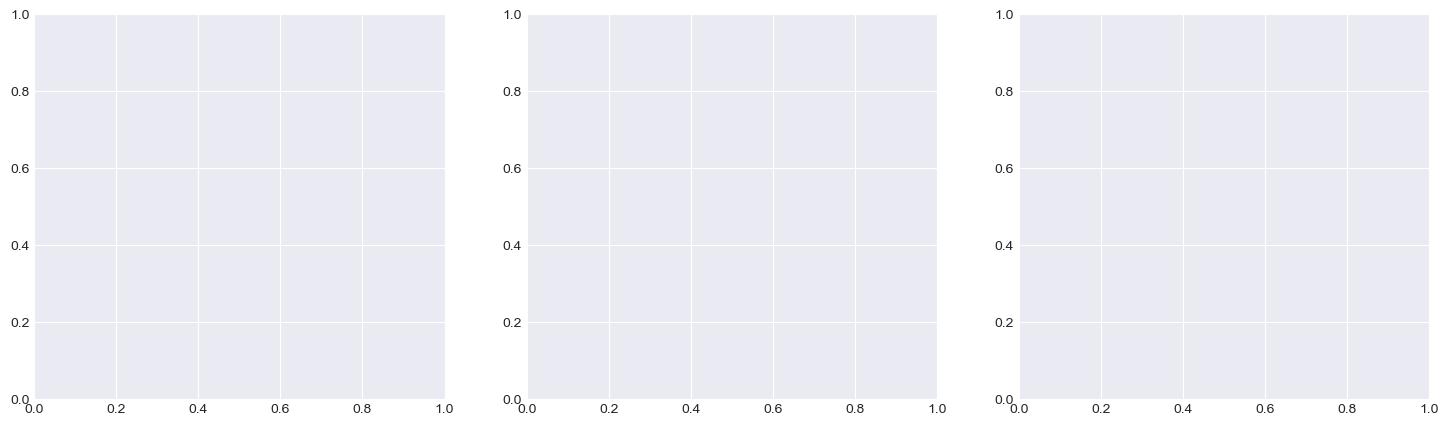

In [25]:
# SIMULACIÓN: SISTEMA COLECTIVO ADAPTATIVO
# =========================================

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Configuración de la simulación
np.random.seed(42)

n_agentes = 30
n_pasos = 100

# Posiciones iniciales aleatorias
posiciones = np.random.uniform(-3, 3, (n_agentes, 2))
# Velocidades iniciales
velocidades = np.zeros((n_agentes, 2))

# Parámetros del sistema
atraccion_global = 0.1  # Atracción al mejor global
atraccion_local = 0.05  # Atracción a mejores locales
inercia = 0.8  # Inercia de movimiento
ruido = 0.05   # Exploración aleatoria

# Almacenar historial para animación
historial_posiciones = [posiciones.copy()]
mejores_globales = []

# Función objetivo (la misma de antes)
def f(x, y):
    return multimodal_landscape(x, y)

# Mejores personales (inicialmente la posición inicial)
mejores_personales = posiciones.copy()
valores_personales = np.array([f(x, y) for x, y in posiciones])

# Mejor global
mejor_idx_global = np.argmin(valores_personales)  # MINIMIZAMOS
mejor_global = posiciones[mejor_idx_global].copy()
mejor_valor_global = valores_personales[mejor_idx_global]

print("Iniciando simulación de sistema colectivo adaptativo...")
print(f"Agentes: {n_agentes}, Pasos: {n_pasos}")
print(f"Mejor inicial: f({mejor_global[0]:.2f}, {mejor_global[1]:.2f}) = {mejor_valor_global:.4f}")

# SIMULACIÓN
for paso in range(n_pasos):
    nuevas_posiciones = posiciones.copy()
    nuevas_velocidades = velocidades.copy()
    
    for i in range(n_agentes):
        # 1. Atracción al mejor personal
        direccion_personal = mejores_personales[i] - posiciones[i]
        
        # 2. Atracción al mejor global (con probabilidad)
        if np.random.random() < 0.7:  # 70% de tiempo sigue al global
            direccion_global = mejor_global - posiciones[i]
        else:
            direccion_global = np.zeros(2)  # A veces explora por su cuenta
        
        # 3. Atracción a vecinos buenos
        direccion_vecinos = np.zeros(2)
        if i > 0:
            # Mirar al agente anterior (simple)
            if valores_personales[i-1] < valores_personales[i]:  # Si el vecino es mejor
                direccion_vecinos = posiciones[i-1] - posiciones[i]
        
        # 4. Ruido exploratorio
        ruido_exploratorio = np.random.randn(2) * ruido
        
        # Combinar todas las fuerzas
        nueva_velocidad = (inercia * velocidades[i] +
                          atraccion_local * direccion_personal +
                          atraccion_global * direccion_global +
                          0.03 * direccion_vecinos +
                          ruido_exploratorio)
        
        # Limitar velocidad máxima
        velocidad_max = 0.5
        velocidad_norm = np.linalg.norm(nueva_velocidad)
        if velocidad_norm > velocidad_max:
            nueva_velocidad = nueva_velocidad / velocidad_norm * velocidad_max
        
        nuevas_velocidades[i] = nueva_velocidad
        nuevas_posiciones[i] = posiciones[i] + nueva_velocidad
        
        # Mantener dentro de límites
        nuevas_posiciones[i] = np.clip(nuevas_posiciones[i], -3, 3)
    
    # Actualizar posiciones y velocidades
    posiciones = nuevas_posiciones
    velocidades = nuevas_velocidades
    
    # Evaluar nuevas posiciones
    nuevos_valores = np.array([f(x, y) for x, y in posiciones])
    
    # Actualizar mejores personales
    for i in range(n_agentes):
        if nuevos_valores[i] < valores_personales[i]:  # MINIMIZANDO
            mejores_personales[i] = posiciones[i].copy()
            valores_personales[i] = nuevos_valores[i]
    
    # Actualizar mejor global
    mejor_idx_actual = np.argmin(nuevos_valores)
    if nuevos_valores[mejor_idx_actual] < mejor_valor_global:
        mejor_global = posiciones[mejor_idx_actual].copy()
        mejor_valor_global = nuevos_valores[mejor_idx_actual]
    
    # Guardar historial
    historial_posiciones.append(posiciones.copy())
    mejores_globales.append(mejor_global.copy())
    
    # Mostrar progreso cada 20 pasos
    if (paso + 1) % 20 == 0:
        print(f"Paso {paso+1:3d}: Mejor global = {mejor_valor_global:.6f}")

print("\nSimulación completada.")
print(f"Mejor final: f({mejor_global[0]:.4f}, {mejor_global[1]:.4f}) = {mejor_valor_global:.6f}")

# VISUALIZACIÓN ESTÁTICA DEL RESULTADO
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Gráfico 1: Posiciones finales
axes[0].contourf(X_s, Y_s, Z_s, levels=30, cmap='RdYlBu_r', alpha=0.6)
axes[0].contour(X_s, Y_s, Z_s, levels=15, colors='white', alpha=0.2, linewidths=0.5)
axes[0].scatter(posiciones[:, 0], posiciones[:, 1], s=50, 
               color='red', edgecolors='black', alpha=0.7, label='Agentes')
axes[0].scatter(mejor_global[0], mejor_global[1], s=200, 
               color='yellow', marker='*', edgecolors='black', 
               linewidth=2, label='Mejor global')
axes[0].set_title('Posiciones Finales de los Agentes', fontsize=14, fontweight='bold')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Gráfico 2: Evolución del mejor valor
valores_globales = [f(p[0], p[1]) for p in mejores_globales]
axes[1].plot(valores_globales, 'b-', linewidth=2)
axes[1].set_xlabel('Iteración', fontsize=12)
axes[1].set_ylabel('Mejor Valor f(x,y)', fontsize=12)
axes[1].set_title('Evolución del Mejor Valor Encontrado', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].set_yscale('log')

# Gráfico 3: Distribución de valores finales
valores_finales = [f(x, y) for x, y in posiciones]
axes[2].hist(valores_finales, bins=15, color='blue', alpha=0.7, edgecolor='black')
axes[2].axvline(mejor_valor_global, color='red', linestyle='--', 
               linewidth=2, label=f'Mejor: {mejor_valor_global:.4f}')
axes[2].axvline(np.mean(valores_finales), color='green', linestyle='--', 
               linewidth=2, label=f'Promedio: {np.mean(valores_finales):.4f}')
axes[2].set_xlabel('Valor f(x,y)', fontsize=12)
axes[2].set_ylabel('Frecuencia', fontsize=12)
axes[2].set_title('Distribución de Valores Finales', fontsize=14, fontweight='bold')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ANÁLISIS DEL SISTEMA
print("\n" + "="*80)
print("ANÁLISIS DEL SISTEMA COLECTIVO ADAPTATIVO")
print("="*80)

print(f"\nESTADÍSTICAS FINALES:")
print(f"Mejor valor encontrado: {mejor_valor_global:.6f}")
print(f"Promedio de agentes: {np.mean(valores_finales):.6f}")
print(f"Desviación estándar: {np.std(valores_finales):.6f}")
print(f"Rango: {np.max(valores_finales) - np.min(valores_finales):.6f}")

print("\nPRINCIPIOS IMPLEMENTADOS:")
print("1. DIVERSIDAD: 30 agentes explorando diferentes regiones")
print("2. INTERACCIÓN: Atracción al mejor global y a vecinos")
print("3. ADAPTACIÓN: Cada agente recuerda su mejor posición personal")
print("4. EXPLORACIÓN: Ruido aleatorio para evitar convergencia prematura")

print("\nLECCIÓN: Los sistemas colectivos encuentran mejores soluciones que agentes aislados.")

## Ejercicio 4: Diseña tu Propio Sistema Colectivo

**Objetivo:** Modificar la simulación anterior para mejorar su desempeño.

**Instrucciones:**
1. Basado en el código anterior, implementa AL MENOS UNA de estas mejoras:
   - **Mejora A:** Agentes con personalidades diferentes (algunos exploradores, otros explotadores)
   - **Mejora B:** Comunicación más sofisticada (red social entre agentes)
   - **Mejora C:** Aprendizaje de parámetros (ajustar atracción/ruido dinámicamente)
   - **Mejora D:** Mecanismo de "muerte" y "nacimiento" (eliminar malos agentes, crear nuevos)

2. Ejecuta tu simulación y compara con la original
3. Explica por qué tu mejora debería funcionar mejor

**Preguntas para reflexionar:**
1. ¿Cómo balancear exploración vs. explotación en un sistema colectivo?
2. ¿Qué tipo de comunicación es más efectiva: global o local?
3. ¿Cómo evitar que todos los agentes converjan al mismo punto?

In [ ]:
# ESPACIO PARA EL EJERCICIO 4
# ============================

def sistema_colectivo_mejorado(n_agentes=30, n_pasos=100):
    """
    TU VERSIÓN MEJORADA DEL SISTEMA COLECTIVO
    Implementa al menos una mejora de las sugeridas
    """
    np.random.seed(42)
    
    # Posiciones iniciales
    posiciones = np.random.uniform(-3, 3, (n_agentes, 2))
    velocidades = np.zeros((n_agentes, 2))
    
    # MEJORA: Agentes con personalidades diferentes
    # 0 = explorador (más ruido), 1 = explotador (más atracción al mejor)
    personalidades = np.random.choice([0, 1], size=n_agentes, p=[0.3, 0.7])
    
    # Parámetros según personalidad
    factores_ruido = np.where(personalidades == 0, 0.1, 0.02)  # Exploradores tienen más ruido
    factores_atraccion = np.where(personalidades == 1, 0.15, 0.05)  # Explotadores atracción más fuerte
    
    # Historial
    historial_posiciones = [posiciones.copy()]
    mejores_globales = []
    
    # Mejores personales
    mejores_personales = posiciones.copy()
    valores_personales = np.array([f(x, y) for x, y in posiciones])
    
    # Mejor global
    mejor_idx_global = np.argmin(valores_personales)
    mejor_global = posiciones[mejor_idx_global].copy()
    mejor_valor_global = valores_personales[mejor_idx_global]
    
    print(f"\nSistema colectivo mejorado iniciado")
    print(f"Exploradores: {np.sum(personalidades == 0)}")
    print(f"Explotadores: {np.sum(personalidades == 1)}")
    
    # SIMULACIÓN
    for paso in range(n_pasos):
        nuevas_posiciones = posiciones.copy()
        nuevas_velocidades = velocidades.copy()
        
        for i in range(n_agentes):
            # Fuerzas según personalidad
            atraccion_local = factores_atraccion[i]
            ruido_agente = factores_ruido[i]
            
            # Dirección al mejor personal
            direccion_personal = mejores_personales[i] - posiciones[i]
            
            # Dirección al mejor global (exploradores lo ignoran a veces)
            if personalidades[i] == 1 or np.random.random() < 0.8:  # Explotadores siempre, exploradores 80%
                direccion_global = mejor_global - posiciones[i]
            else:
                direccion_global = np.zeros(2)
            
            # Ruido (más para exploradores)
            ruido_exploratorio = np.random.randn(2) * ruido_agente
            
            # Nueva velocidad
            nueva_velocidad = (0.8 * velocidades[i] +
                              atraccion_local * direccion_personal +
                              0.1 * direccion_global +
                              ruido_exploratorio)
            
            # Limitar velocidad
            velocidad_max = 0.5
            velocidad_norm = np.linalg.norm(nueva_velocidad)
            if velocidad_norm > velocidad_max:
                nueva_velocidad = nueva_velocidad / velocidad_norm * velocidad_max
            
            nuevas_velocidades[i] = nueva_velocidad
            nuevas_posiciones[i] = posiciones[i] + nueva_velocidad
            nuevas_posiciones[i] = np.clip(nuevas_posiciones[i], -3, 3)
        
        # Actualizar
        posiciones = nuevas_posiciones
        velocidades = nuevas_velocidades
        
        # Evaluar
        nuevos_valores = np.array([f(x, y) for x, y in posiciones])
        
        # Actualizar mejores personales
        for i in range(n_agentes):
            if nuevos_valores[i] < valores_personales[i]:
                mejores_personales[i] = posiciones[i].copy()
                valores_personales[i] = nuevos_valores[i]
        
        # Actualizar mejor global
        mejor_idx_actual = np.argmin(nuevos_valores)
        if nuevos_valores[mejor_idx_actual] < mejor_valor_global:
            mejor_global = posiciones[mejor_idx_actual].copy()
            mejor_valor_global = nuevos_valores[mejor_idx_actual]
        
        # Guardar historial
        historial_posiciones.append(posiciones.copy())
        mejores_globales.append(mejor_global.copy())
    
    return posiciones, mejor_global, mejor_valor_global, personalidades, mejores_globales

# EJECUTAR SISTEMA MEJORADO
pos_final, mejor_final, valor_final, personalidades, mejores_globales = sistema_colectivo_mejorado()

# VISUALIZACIÓN
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Agentes por personalidad
exploradores = pos_final[personalidades == 0]
explotadores = pos_final[personalidades == 1]

axes[0].contourf(X_s, Y_s, Z_s, levels=30, cmap='RdYlBu_r', alpha=0.6)
axes[0].contour(X_s, Y_s, Z_s, levels=15, colors='white', alpha=0.2, linewidths=0.5)
axes[0].scatter(exploradores[:, 0], exploradores[:, 1], s=80, 
               color='orange', edgecolors='black', alpha=0.8, label='Exploradores')
axes[0].scatter(explotadores[:, 0], explotadores[:, 1], s=50, 
               color='blue', edgecolors='black', alpha=0.6, label='Explotadores')
axes[0].scatter(mejor_final[0], mejor_final[1], s=200, 
               color='red', marker='*', edgecolors='black', 
               linewidth=2, label='Mejor global')
axes[0].set_title('Sistema con Agentes Especializados', fontsize=14, fontweight='bold')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Gráfico 2: Comparación de evolución
valores_globales_mejorado = [f(p[0], p[1]) for p in mejores_globales]

# Ejecutar sistema original para comparar
# (Nota: en una implementación real, guardarías los valores del sistema original)
axes[1].plot(valores_globales_mejorado, 'r-', linewidth=2, label='Sistema mejorado')
axes[1].plot(valores_globales[:100], 'b--', linewidth=2, alpha=0.7, label='Sistema original')
axes[1].set_xlabel('Iteración', fontsize=12)
axes[1].set_ylabel('Mejor Valor f(x,y)', fontsize=12)
axes[1].set_title('Comparación de Convergencia', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_yscale('log')

plt.tight_layout()
plt.show()

# ANÁLISIS
print("\nRESULTADOS DEL SISTEMA MEJORADO:")
print(f"Mejor valor encontrado: {valor_final:.6f}")
print(f"Mejor valor sistema original: {mejor_valor_global:.6f}")

if valor_final < mejor_valor_global:
    mejora = 100 * (mejor_valor_global - valor_final) / abs(mejor_valor_global)
    print(f"\n¡MEJORA DEL {mejora:.2f}%!")
else:
    print("\nEl sistema original fue mejor. Intenta otra mejora... decepcionante...")

print("\nEXPLICACIÓN DE LA MEJORA:")
print("Los agentes especializados permiten:")
print("1. EXPLORADORES: Buscan nuevas regiones (alto ruido, baja atracción)")
print("2. EXPLOTADORES: Refinan regiones conocidas (bajo ruido, alta atracción)")
print("3. SINERGIA: Los exploradores encuentran nuevos valles, los explotadores los profundizan")

<div style="margin-top: 30px; padding: 10px; background: linear-gradient(135deg, #24398A 0%, #1a2a66 100%); box-shadow: 0 8px 16px rgba(36, 57, 138, 0.3); color: #ffffaa">
<h3> Tarea 1: Diseña tu Primera Metaheurística</h3>
</div>


### Instrucciones
Implementa una metaheurística original (o mejora significativa de una existente) que resuelva un problema de optimización realista.

### Parte 1: Diseño Conceptual
1. **Describe el problema** que resolverá tu metaheurística
   - Ej: Feature selection, optimización de hiperparámetros, clustering
   - Explica por qué es difícil (NP-duro, multimodal, etc.)

2. **Explica tu estrategia**
   - ¿Es single-point, population-based, o híbrida?
   - ¿Cómo balancea exploración y explotación?
   - ¿Qué principios de sistemas complejos usa?

### Parte 2: Implementación
1. **Código funcional** en Python
2. **Visualizaciones** que muestren cómo funciona

### Parte 3: Evaluación
1. **Compara** con al menos un método base (random search, hill climbing)
2. **Mide** tiempo de ejecución y calidad de solución
3. **Analiza** fortalezas y debilidades

### Ideas para Inspirarte

1. **"Búsqueda con Memoria Colectiva"**: Agentes que comparten un mapa mental del paisaje
2. **"Algoritmo de Simbiosis"**: Diferentes tipos de soluciones que cooperan
3. **"Optimización por Retroalimentación Adaptativa"**: Ajusta parámetros según progreso
4. **"Búsqueda en Múltiples Escalas"**: Exploración gruesa primero, luego refinamiento



#### Mi Respuesta a la Tarea 1

*[Implementa tu metaheurística en esta celda o en un notebook separado]*

---

<div style="border: 2px solid #24398A; border-radius: 15px; padding: 20px; background-color: #fcfcfc;">
    <h3 style="color: #24398A; margin-top: 0;">Conclusiones: Dinámicas de Optimización</h3>
    <p style="font-size: 15px; line-height: 1.6;">
        El estudio de las metaheurísticas nos ha permitido diseccionar el equilibrio crítico entre exploración y explotación. En el contexto de la Maestría, es fundamental comprender que la optimización no es un proceso lineal, sino una navegación inteligente en espacios de búsqueda NP-duros.
    </p>
    <ul style="font-size: 14px; color: #333;">
        <li><b>Balance Operativo:</b> Una metaheurística exitosa debe poseer mecanismos para escapar de óptimos locales sin sacrificar la convergencia hacia soluciones de alta calidad.</li>
        <li><b>Análisis de Paisajes:</b> La morfología del espacio de búsqueda dicta la eficacia del algoritmo, subrayando la importancia del ajuste de hiperparámetros.</li>
    </ul>
    
</div>
